In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt 
import seaborn as sns
import osmnx as ox
from collections import defaultdict
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import folium

In [2]:
df_05 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202205-divvy-tripdata.csv')
df_06 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202206-divvy-tripdata.csv')
df_07 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202207-divvy-tripdata.csv')
df_08 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202208-divvy-tripdata.csv')
df_09 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202209-divvy-publictripdata.csv')
df_10 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202210-divvy-tripdata.csv')
df_11 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202211-divvy-tripdata.csv')
df_12 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202212-divvy-tripdata.csv')
df_01 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202301-divvy-tripdata.csv')
df_02 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202302-divvy-tripdata.csv')
df_03 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202303-divvy-tripdata.csv')
df_04 = pd.read_csv('/Users/mariu/Desktop/Masterarbeit/archive/202304-divvy-tripdata.csv')

df = pd.concat([df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_01, df_02, df_03, df_04], ignore_index=True)





In [3]:
df = df.dropna().reset_index()


In [4]:
unique_stations_start = df.groupby('end_station_id').first().reset_index()

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])


df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


df = df[(df['ride_duration'] >= 5) & (df['ride_duration'] <= 120)]

df_start = df

In [27]:
unique_stations_start

end_station_id    index           ride_id  rideable_type  \
0            021320    63163  D2388B91DBAA4B3E  electric_bike   
1              1011  1573241  7209DA74F0A5B961  electric_bike   
2              1012  1538346  8A6CD8D6567E45AD  electric_bike   
3              1013  1493729  6DCF5CF55FC9F00D  electric_bike   
4              1015  2293872  690FA7CBBD2D95A7  electric_bike   
...             ...      ...               ...            ...   
1287  chargingstx07  4273602  9CE61EF14755D342  electric_bike   
1288   chargingstx1      411  7B0EA0134C7F227D  electric_bike   
1289   chargingstx3     3587  9F3E7293FCFBF16D   classic_bike   
1290   chargingstx4     7512  BF4DFF44359E02BB   classic_bike   
1291   chargingstx5      163  6D23D2F48E251B30   classic_bike   

               started_at             ended_at  \
0     2022-05-23 06:19:07  2022-05-23 06:31:38   
1     2022-07-11 08:21:53  2022-07-11 08:44:14   
2     2022-07-09 19:54:28  2022-07-09 20:08:54   
3     2022-07-26 18:18:00  2022-07-26 18:27:55   
4     2022-08-03 21:19:06  2022-08-03 21:43:32   
...                   ...                  ...   
1287  2022-11-18 09:58:44  2022-11-18 10:05:27   
1288  2022-05-22 16:10:00  2022-05-22 16:41:40   
1289  2022-05-12 17:29:00  2022-05-12 17:40:16   
1290  2022-05-12 06:45:33  2022-05-12 08:07:49   
1291  2022-05-11 10:44:04  2022-05-11 10:51:35   

                          start_station_name start_station_id  \
0                                 Walsh Park            18067   
1                  Narragansett & Wrightwood              314   
2            Blackstone Ave & Hyde Park Blvd            13398   
3     Public Rack - Keystone Ave & North Ave              518   
4                     Clark St & Elmdale Ave     KA1504000148   
...                                      ...              ...   
1287           Franklin St & Adams St (Temp)     TA1309000008   
1288                 Hermitage Ave & Polk St            13080   
1289                 Canal St & Jackson Blvd            13138   
1290                   Franklin St & Lake St     TA1307000111   
1291                Lincoln Ave & Roscoe St*     chargingstx5   

                                    end_station_name  start_lat  start_lng  \
0                                     MTV Hubbard St  41.914518 -87.667852   
1     Public Rack - Fullerton Ave & Narragansett Ave  41.930000 -87.790000   
2                Public Rack - Langley Ave & 49th St  41.802594 -87.590205   
3                 Public Rack - Pulaski Rd & Lake St  41.910000 -87.730000   
4             Public Rack - Peterson Ave & Drake Ave  41.990912 -87.669740   
...                                              ...        ...        ...   
1287                         Green St & Madison Ave*  41.879063 -87.635010   
1288                      Bissell St & Armitage Ave*  41.871537 -87.669970   
1289                         Green St & Randolph St*  41.877245 -87.639366   
1290                            Morgan St & Lake St*  41.885837 -87.635500   
1291                        Lincoln Ave & Roscoe St*  41.943350 -87.670668   

        end_lat    end_lng member_casual  
0     41.890000 -87.680000        member  
1     41.920000 -87.790000        casual  
2     41.810000 -87.610000        casual  
3     41.890000 -87.730000        casual  
4     41.990000 -87.720000        casual  
...         ...        ...           ...  
1287  41.881827 -87.648832        member  
1288  41.918296 -87.652183        casual  
1289  41.883602 -87.648627        casual  
1290  41.885492 -87.652289        member  
1291  41.943350 -87.670668        member  

[1292 rows x 14 columns]

In [14]:
# Angenommen, df enthält bereits die notwendigen Informationen und 'ride_id' ist die Spalte, die jede Fahrt eindeutig kennzeichnet
# 'start_station_id' und 'end_station_id' kennzeichnen die Start- und Endstation jeder Fahrt

# Zählen der Gesamtanzahl der Starts und Ends je Station
start_counts = df.groupby('start_station_id')['ride_id'].count().reset_index(name='start_counts')
end_counts = df.groupby('end_station_id')['ride_id'].count().reset_index(name='end_counts')

# Zusammenführen der Start- und Endcounts je Station
# Da nicht jede Station sowohl in start_counts als auch in end_counts vorhanden sein muss, verwenden wir 'outer' join
total_counts = pd.merge(start_counts, end_counts, left_on='start_station_id', right_on='end_station_id', how='outer')

# Füllen der NaN-Werte mit 0, da eine fehlende Zahl darauf hinweist, dass keine Fahrten gestartet oder beendet wurden
total_counts.fillna(0, inplace=True)

# Berechnen der Gesamtanzahl der Trips je Station
total_counts['total_trips'] = total_counts['start_counts'] + total_counts['end_counts']

# Ergebnis vorbereiten: Ein DataFrame mit Station ID und Gesamtanzahl der Trips
# Hierbei muss beachtet werden, dass die Station IDs von Start und Ende vereinheitlicht werden müssen
total_counts['station_id'] = total_counts.apply(lambda x: x['start_station_id'] if pd.notnull(x['start_station_id']) else x['end_station_id'], axis=1)
total_counts = total_counts[['station_id', 'total_trips']]

total_counts


station_id  total_trips
0        021320        794.0
1          1011         71.0
2          1012          7.0
3          1013         14.0
4          1014          2.0
...         ...          ...
1298          0          3.0
1299          0          1.0
1300          0          1.0
1301          0          2.0
1302          0          5.0

[1303 rows x 2 columns]

In [6]:
# Anzahl der Stationen mit weniger als 100 Trips
stations_less_than_100 = total_counts[total_counts['total_trips'] < 100].shape[0]

# Anzahl der Stationen mit weniger als 200 Trips
stations_less_than_200 = total_counts[total_counts['total_trips'] < 200].shape[0]

print(f"Anzahl der Stationen mit weniger als 100 Trips: {stations_less_than_100}")
print(f"Anzahl der Stationen mit weniger als 200 Trips: {stations_less_than_200}")


Anzahl der Stationen mit weniger als 100 Trips: 464
Anzahl der Stationen mit weniger als 200 Trips: 575


In [29]:
import pandas as pd

# Angenommen, df ist dein Haupt-DataFrame, der alle Trips enthält

# Berechnung der Gesamttrips je Station
total_trips_per_station = df_start.groupby('start_station_id')['ride_id'].count().reset_index(name='total_trips')

# Filtern der Stationen mit weniger als 100 Trips
stations_to_remove = total_trips_per_station[total_trips_per_station['total_trips'] < 200]['start_station_id']

# Entfernen der Stationen mit weniger als 100 Trips aus dem Haupt-DataFrame
df_filtered = df_start[~df_start['start_station_id'].isin(stations_to_remove)]

unique_stations_filtered = unique_stations_start[~unique_stations_start['start_station_id'].isin(stations_to_remove)]


In [30]:
unique_stations_filtered

end_station_id    index           ride_id  rideable_type  \
0            021320    63163  D2388B91DBAA4B3E  electric_bike   
1              1011  1573241  7209DA74F0A5B961  electric_bike   
2              1012  1538346  8A6CD8D6567E45AD  electric_bike   
3              1013  1493729  6DCF5CF55FC9F00D  electric_bike   
4              1015  2293872  690FA7CBBD2D95A7  electric_bike   
...             ...      ...               ...            ...   
1287  chargingstx07  4273602  9CE61EF14755D342  electric_bike   
1288   chargingstx1      411  7B0EA0134C7F227D  electric_bike   
1289   chargingstx3     3587  9F3E7293FCFBF16D   classic_bike   
1290   chargingstx4     7512  BF4DFF44359E02BB   classic_bike   
1291   chargingstx5      163  6D23D2F48E251B30   classic_bike   

               started_at             ended_at  \
0     2022-05-23 06:19:07  2022-05-23 06:31:38   
1     2022-07-11 08:21:53  2022-07-11 08:44:14   
2     2022-07-09 19:54:28  2022-07-09 20:08:54   
3     2022-07-26 18:18:00  2022-07-26 18:27:55   
4     2022-08-03 21:19:06  2022-08-03 21:43:32   
...                   ...                  ...   
1287  2022-11-18 09:58:44  2022-11-18 10:05:27   
1288  2022-05-22 16:10:00  2022-05-22 16:41:40   
1289  2022-05-12 17:29:00  2022-05-12 17:40:16   
1290  2022-05-12 06:45:33  2022-05-12 08:07:49   
1291  2022-05-11 10:44:04  2022-05-11 10:51:35   

                          start_station_name start_station_id  \
0                                 Walsh Park            18067   
1                  Narragansett & Wrightwood              314   
2            Blackstone Ave & Hyde Park Blvd            13398   
3     Public Rack - Keystone Ave & North Ave              518   
4                     Clark St & Elmdale Ave     KA1504000148   
...                                      ...              ...   
1287           Franklin St & Adams St (Temp)     TA1309000008   
1288                 Hermitage Ave & Polk St            13080   
1289                 Canal St & Jackson Blvd            13138   
1290                   Franklin St & Lake St     TA1307000111   
1291                Lincoln Ave & Roscoe St*     chargingstx5   

                                    end_station_name  start_lat  start_lng  \
0                                     MTV Hubbard St  41.914518 -87.667852   
1     Public Rack - Fullerton Ave & Narragansett Ave  41.930000 -87.790000   
2                Public Rack - Langley Ave & 49th St  41.802594 -87.590205   
3                 Public Rack - Pulaski Rd & Lake St  41.910000 -87.730000   
4             Public Rack - Peterson Ave & Drake Ave  41.990912 -87.669740   
...                                              ...        ...        ...   
1287                         Green St & Madison Ave*  41.879063 -87.635010   
1288                      Bissell St & Armitage Ave*  41.871537 -87.669970   
1289                         Green St & Randolph St*  41.877245 -87.639366   
1290                            Morgan St & Lake St*  41.885837 -87.635500   
1291                        Lincoln Ave & Roscoe St*  41.943350 -87.670668   

        end_lat    end_lng member_casual  
0     41.890000 -87.680000        member  
1     41.920000 -87.790000        casual  
2     41.810000 -87.610000        casual  
3     41.890000 -87.730000        casual  
4     41.990000 -87.720000        casual  
...         ...        ...           ...  
1287  41.881827 -87.648832        member  
1288  41.918296 -87.652183        casual  
1289  41.883602 -87.648627        casual  
1290  41.885492 -87.652289        member  
1291  41.943350 -87.670668        member  

[894 rows x 14 columns]

In [40]:
import folium

# Erstelle eine Karte, zentriert auf den Durchschnitt der Koordinaten
map = folium.Map(location=[unique_stations_start['start_lat'].mean(), unique_stations_start['start_lng'].mean()], zoom_start=12)

# Filtere die zu entfernenden Stationen aus unique_stations_start
to_remove = unique_stations_start[unique_stations_start['start_station_id'].isin(stations_to_remove)]

# Füge für jede zu entfernende Station einen Marker hinzu
for idx, row in to_remove.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=row['start_station_id'],
        icon=folium.Icon(color='red', icon='remove')
    ).add_to(map)

# Speichere die Karte als HTML oder zeige sie direkt an
map
# Oder um direkt im Jupyter Notebook anzuzeigen: display(map)



/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anacond

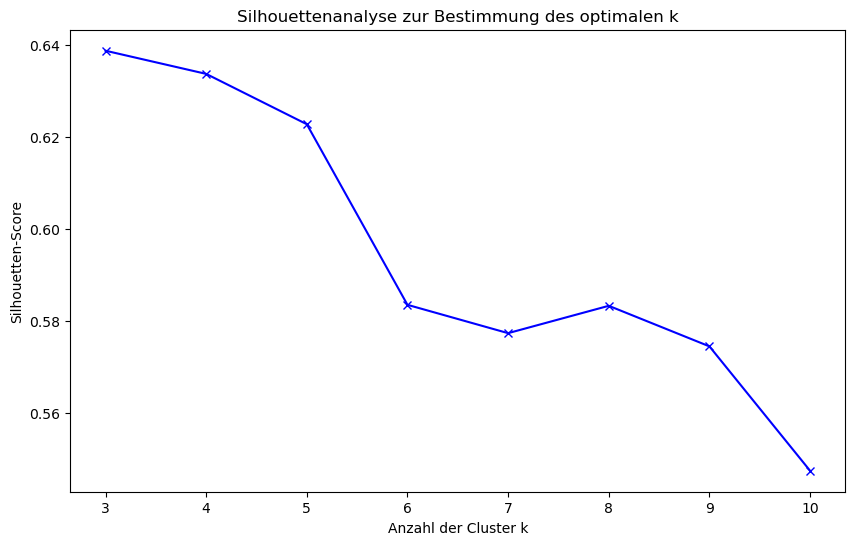

In [31]:
# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df_filtered.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Erstellen des Pivot-Tables
pivot_df = df.pivot_table(index='end_station_id', 
                        columns='weekday_hour', 
                        values='ride_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_df.columns if col != 'end_station_id'])
pivot_df = pivot_df[sorted_columns]

features = pivot_df.drop('end_station_id', axis=1)

# Normalisierung der Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

silhouette_scores = []
K = range(3, 11)  # Silhouetten-Score kann nicht mit k=1 berechnet werden
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Anzahl der Cluster k')
plt.ylabel('Silhouetten-Score')
plt.title('Silhouettenanalyse zur Bestimmung des optimalen k')
plt.show()



/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anacond

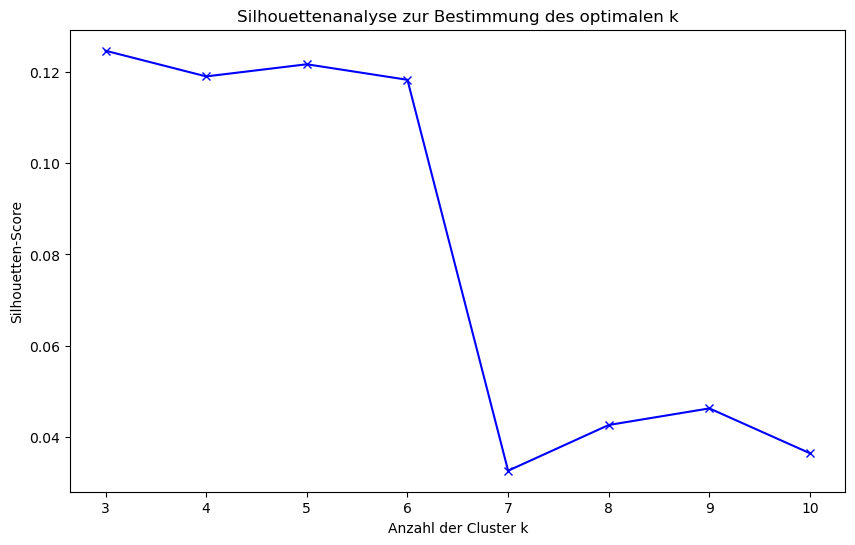

In [94]:
# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df_filtered.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Erstellen des Pivot-Tables
pivot_df = df.pivot_table(index='end_station_id', 
                          columns='weekday_hour', 
                          values='ride_id', 
                          aggfunc='count', 
                          fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_df.columns if col != 'end_station_id'])
pivot_df = pivot_df[sorted_columns]

features = pivot_df.drop('end_station_id', axis=1)
# Initiate the scaler
scaler = StandardScaler()

# Apply the scaler row-wise and reformat the result for kmeans
scaled_features_rowwise = np.vstack(features.apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten(), axis=1))

silhouette_scores = []
K = range(3, 11)  # Silhouetten-Score kann nicht mit k=1 berechnet werden
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_rowwise)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features_rowwise, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Anzahl der Cluster k')
plt.ylabel('Silhouetten-Score')
plt.title('Silhouettenanalyse zur Bestimmung des optimalen k')
plt.show()



In [95]:
# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df_filtered.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Erstellen des Pivot-Tables
pivot_df = df.pivot_table(index='end_station_id', 
                          columns='weekday_hour', 
                          values='ride_id', 
                          aggfunc='count', 
                          fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_df.columns if col != 'end_station_id'])
pivot_df = pivot_df[sorted_columns]

features = pivot_df.drop('end_station_id', axis=1)
# Initiate the scaler
scaler = StandardScaler()

# Apply the scaler row-wise and reformat the result for kmeans
scaled_features_rowwise = np.vstack(features.apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten(), axis=1))

# Now, scaled_features_rowwise is correctly formatted for kmeans
kmeans = KMeans(n_clusters=6)  # Adjust the number of clusters as needed for your analysis
clusters = kmeans.fit_predict(scaled_features_rowwise)

# Add the cluster assignments back to the DataFrame
pivot_df['cluster'] = clusters

# Display the result
print(pivot_df.head())


/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


weekday_hour end_station_id  0_00  0_01  0_02  0_03  0_04  0_05  0_06  0_07  \
0                    021320     0     0     0     0     0     0     3     4   
1                      1011     0     0     0     0     0     0     0     0   
2                      1012     0     0     0     0     0     0     0     0   
3                      1013     0     0     0     0     0     0     0     0   
4                      1015     0     0     0     0     0     0     0     0   

weekday_hour  0_08  ...  6_15  6_16  6_17  6_18  6_19  6_20  6_21  6_22  6_23  \
0                8  ...     3     0     0     1     0     0     2     0     0   
1                1  ...     0     0     0     0     0     2     0     0     0   
2                0  ...     0     0     0     0     0     0     0     0     0   
3                0  ...     0     0     0     0     0     0     0     1     0   
4                0  ...     0     0     0     0     0     0     0     0     0   

weekday_hour  cluster  
0             

/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anacond

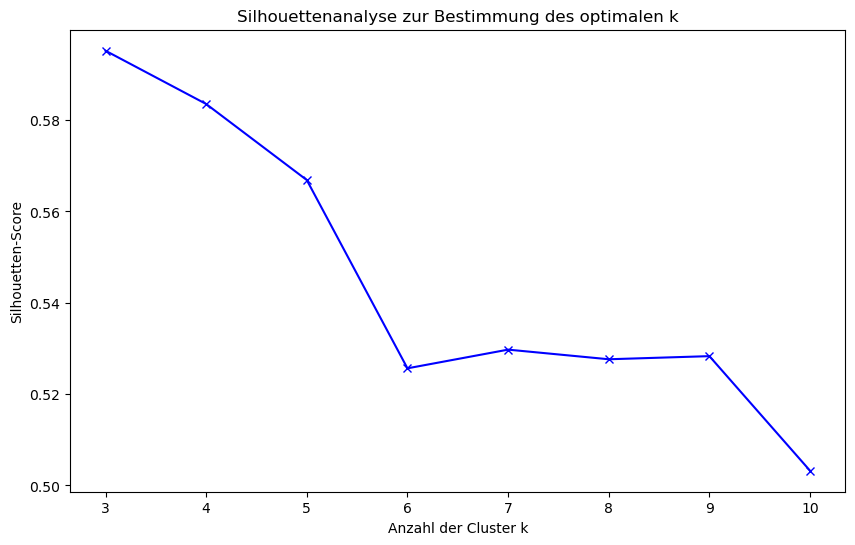

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Angenommen df_filtered ist bereits definiert und enthält 'ended_at' als datetime
df = df_filtered.copy()

# Extraktion von Stunde, Wochentag und Quartal
df['hour'] = df['ended_at'].dt.hour
df['weekday'] = df['ended_at'].dt.dayofweek
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 für Wochenende, 0 für Wochentag
df['quarter'] = df['ended_at'].dt.quarter

# Kombinieren von 'weekday', 'hour', 'is_weekend' und 'quarter' zu einer eindeutigen Identifikation
df['weekday_hour_weekend_quarter'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2) + "_" + df['is_weekend'].astype(str) + "_Q" + df['quarter'].astype(str)

# Erstellen des Pivot-Tables
pivot_df = df.pivot_table(index='end_station_id', 
                          columns='weekday_hour_weekend_quarter', 
                          values='ride_id', 
                          aggfunc='count', 
                          fill_value=0).reset_index()

# Sortieren der Spalten in chronologischer und logischer Reihenfolge
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_df.columns if col != 'end_station_id'])
pivot_df = pivot_df[sorted_columns]

# Extrahieren der Features und Normalisierung
features = pivot_df.drop('end_station_id', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

silhouette_scores = []
K = range(3, 11)  # Silhouetten-Score kann nicht mit k=1 berechnet werden
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Anzahl der Cluster k')
plt.ylabel('Silhouetten-Score')
plt.title('Silhouettenanalyse zur Bestimmung des optimalen k')
plt.show()


In [74]:

# Angenommen df_filtered ist bereits definiert und enthält 'ended_at' als datetime
df = df_filtered.copy()

# Extraktion von Stunde, Wochentag und Quartal
df['hour'] = df['ended_at'].dt.hour
df['weekday'] = df['ended_at'].dt.dayofweek
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 für Wochenende, 0 für Wochentag
df['quarter'] = df['ended_at'].dt.quarter

# Kombinieren von 'weekday', 'hour', 'is_weekend' und 'quarter' zu einer eindeutigen Identifikation
df['weekday_hour_weekend_quarter'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2) + "_" + df['is_weekend'].astype(str) + "_Q" + df['quarter'].astype(str)

# Erstellen des Pivot-Tables
pivot_df = df.pivot_table(index='end_station_id', 
                          columns='weekday_hour_weekend_quarter', 
                          values='ride_id', 
                          aggfunc='count', 
                          fill_value=0).reset_index()

# Sortieren der Spalten in chronologischer und logischer Reihenfolge
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_df.columns if col != 'end_station_id'])
pivot_df = pivot_df[sorted_columns]

# Extrahieren der Features und Normalisierung
features = pivot_df.drop('end_station_id', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Anpassen der Clusteranzahl nach Bedarf
clusters = kmeans.fit_predict(scaled_features)

# Cluster-Zuweisungen zum DataFrame hinzufügen
pivot_df['cluster'] = clusters

# Ergebnis ausgeben
print(pivot_df.head())


/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


weekday_hour_weekend_quarter end_station_id  0_00_0_Q1  0_00_0_Q2  0_00_0_Q3  \
0                                    021320          0          0          0   
1                                      1011          0          0          0   
2                                      1012          0          0          0   
3                                      1013          0          0          0   
4                                      1015          0          0          0   

weekday_hour_weekend_quarter  0_00_0_Q4  0_01_0_Q1  0_01_0_Q2  0_01_0_Q3  \
0                                     0          0          0          0   
1                                     0          0          0          0   
2                                     0          0          0          0   
3                                     0          0          0          0   
4                                     0          0          0          0   

weekday_hour_weekend_quarter  0_01_0_Q4  0_02_0_Q1  ...  6_21_

In [81]:
# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Erstellen des Pivot-Tables
pivot_df = df.pivot_table(index='end_station_id', 
                          columns='weekday_hour', 
                          values='ride_id', 
                          aggfunc='count', 
                          fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_df.columns if col != 'end_station_id'])
pivot_df = pivot_df[sorted_columns]

features = pivot_df.drop('end_station_id', axis=1)

# Normalisierung der Features, da die Skala der Fahrtanzahlen sehr unterschiedlich sein kann
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Anwendung des K-Means-Clustering
kmeans = KMeans(n_clusters=4)  # Die Anzahl der Cluster kann angepasst werden, basierend auf der spezifischen Analyse
clusters = kmeans.fit_predict(scaled_features)

# Hinzufügen der Cluster-Zuweisungen zum DataFrame
pivot_df['cluster'] = clusters

# Ergebnis anzeigen
print(pivot_df.head())

/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


weekday_hour end_station_id  0_00  0_01  0_02  0_03  0_04  0_05  0_06  0_07  \
0                    021320     0     0     0     0     0     1     5     4   
1                      1011     0     0     0     0     0     0     1     0   
2                      1012     0     0     0     0     0     0     0     0   
3                      1013     0     0     0     0     0     0     0     0   
4                      1015     0     0     0     0     0     0     0     0   

weekday_hour  0_08  ...  6_15  6_16  6_17  6_18  6_19  6_20  6_21  6_22  6_23  \
0                8  ...     3     0     0     1     0     0     2     0     0   
1                2  ...     0     1     0     0     1     3     0     0     0   
2                0  ...     0     0     0     0     0     0     0     0     0   
3                0  ...     0     0     0     0     0     0     0     1     0   
4                0  ...     0     0     0     0     0     0     0     0     0   

weekday_hour  cluster  
0             

In [47]:


# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df_start.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Erstellen des Pivot-Tables
pivot_df_dbscan = df.pivot_table(index='end_station_id', 
                          columns='weekday_hour', 
                          values='ride_id', 
                          aggfunc='count', 
                          fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_df.columns if col != 'end_station_id'])
pivot_df_dbscan = pivot_df[sorted_columns]

features = pivot_df_dbscan.drop('end_station_id', axis=1)

# Anwendung von DBSCAN
# eps: Der maximale Abstand zwischen zwei Samples, damit sie als im selben Cluster betrachtet werden
# min_samples: Die Anzahl von Samples in einer Nachbarschaft für einen Punkt, um als Kernpunkt betrachtet zu werden
dbscan = DBSCAN(eps=1000, min_samples=200)

# 'features' sollte dein skaliertes Feature-Array sein
clusters = dbscan.fit_predict(features)

# Hinzufügen der Cluster-Zuweisungen zu deinem DataFrame
pivot_df_dbscan['cluster'] = clusters

# Ergebnis anzeigen
print(pivot_df_dbscan.head())


weekday_hour end_station_id  0_00  0_01  0_02  0_03  0_04  0_05  0_06  0_07  \
0                    021320     0     0     0     0     0     1     5     4   
1                      1011     0     0     0     0     0     0     1     0   
2                      1012     0     0     0     0     0     0     0     0   
3                      1013     0     0     0     0     0     0     0     0   
4                      1015     0     0     0     0     0     0     0     0   

weekday_hour  0_08  ...  6_15  6_16  6_17  6_18  6_19  6_20  6_21  6_22  6_23  \
0                8  ...     3     0     0     1     0     0     2     0     0   
1                2  ...     0     1     0     0     1     3     0     0     0   
2                0  ...     0     0     0     0     0     0     0     0     0   
3                0  ...     0     0     0     0     0     0     0     1     0   
4                0  ...     0     0     0     0     0     0     0     0     0   

weekday_hour  cluster  
0             

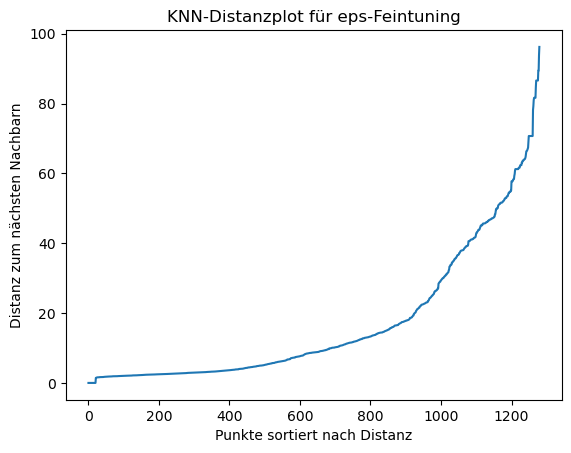

In [52]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Erstellen eines Nearest Neighbors Modells
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)

# Sortieren der Distanzen
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plotten der Distanzen
plt.plot(distances)
plt.title("KNN-Distanzplot für eps-Feintuning")
plt.xlabel("Punkte sortiert nach Distanz")
plt.ylabel("Distanz zum nächsten Nachbarn")
plt.show()


/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariu/anacond

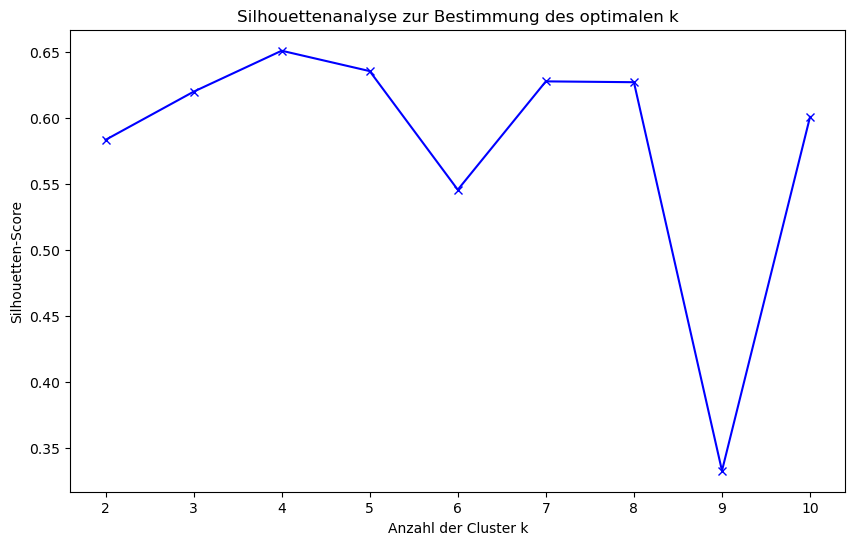

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Berechnung der Gesamtzahl der Fahrten pro Station
total_rides_per_station = df.groupby('end_station_id')['ride_id'].count().reset_index(name='total_rides')

# Berechnung der Anzahl der Fahrten pro Station, Wochentag und Stunde
rides_per_station_weekday_hour = df.groupby(['end_station_id', 'weekday_hour'])['ride_id'].count().reset_index(name='rides')

# Zusammenführen der Gesamtzahl der Fahrten mit den stündlichen Fahrten
merged = pd.merge(rides_per_station_weekday_hour, total_rides_per_station, on='end_station_id')

# Berechnung des prozentualen Anteils der stündlichen Fahrten von den Gesamtfahrten jeder Station
merged['percentage'] = (merged['rides'] / merged['total_rides']) * 100

# Pivotierung der Daten, um jede Station als eine Zeile und jede 'weekday_hour' Kombination als eine Spalte zu haben
pivot_table = merged.pivot_table(index='end_station_id', columns='weekday_hour', values='percentage', fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren, ohne 'start_station_id' zu berücksichtigen
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_table.columns if col != 'end_station_id'])
pivot_table = pivot_table[sorted_columns]

# Extraktion der Features für das Clustering
features = pivot_table.drop('end_station_id', axis=1)

# Normalisierung der Features
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

silhouette_scores = []
K = range(2, 11)  # Silhouetten-Score kann nicht mit k=1 berechnet werden
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Anzahl der Cluster k')
plt.ylabel('Silhouetten-Score')
plt.title('Silhouettenanalyse zur Bestimmung des optimalen k')
plt.show()
# Anwendung des K-Means-Clustering
#kmeans = KMeans(n_clusters=3)  # Anpassung der Clusteranzahl möglich
#clusters = kmeans.fit_predict(scaled_features)

# Hinzufügen der Cluster-Zuweisungen zum DataFrame
#pivot_table['cluster'] = clusters

# Ergebnis anzeigen
#print(pivot_table.head())


In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Berechnung der Gesamtzahl der Fahrten pro Station
total_rides_per_station = df.groupby('end_station_id')['ride_id'].count().reset_index(name='total_rides')

# Berechnung der Anzahl der Fahrten pro Station, Wochentag und Stunde
rides_per_station_weekday_hour = df.groupby(['end_station_id', 'weekday_hour'])['ride_id'].count().reset_index(name='rides')

# Zusammenführen der Gesamtzahl der Fahrten mit den stündlichen Fahrten
merged = pd.merge(rides_per_station_weekday_hour, total_rides_per_station, on='end_station_id')

# Berechnung des prozentualen Anteils der stündlichen Fahrten von den Gesamtfahrten jeder Station
merged['percentage'] = (merged['rides'] / merged['total_rides']) * 100

# Pivotierung der Daten, um jede Station als eine Zeile und jede 'weekday_hour' Kombination als eine Spalte zu haben
pivot_table = merged.pivot_table(index='end_station_id', columns='weekday_hour', values='percentage', fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren, ohne 'start_station_id' zu berücksichtigen
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_table.columns if col != 'end_station_id'])
pivot_table = pivot_table[sorted_columns]

# Extraktion der Features für das Clustering
features = pivot_table.drop('end_station_id', axis=1)

# Normalisierung der Features
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Anwendung des K-Means-Clustering
kmeans = KMeans(n_clusters=7)  # Anpassung der Clusteranzahl möglich
clusters = kmeans.fit_predict(features)

# Hinzufügen der Cluster-Zuweisungen zum DataFrame
pivot_table['cluster'] = clusters

# Ergebnis anzeigen
print(pivot_table.head())


/Users/mariu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


weekday_hour end_station_id  0_00  0_01  0_02  0_03  0_04      0_05      0_06  \
0                    021320   0.0   0.0   0.0   0.0   0.0  0.289017  1.445087   
1                      1011   0.0   0.0   0.0   0.0   0.0  0.000000  2.325581   
2                      1012   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
3                      1013   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
4                      1015   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   

weekday_hour      0_07      0_08  ...      6_15      6_16  6_17      6_18  \
0             1.156069  2.312139  ...  0.867052  0.000000   0.0  0.289017   
1             0.000000  4.651163  ...  0.000000  2.325581   0.0  0.000000   
2             0.000000  0.000000  ...  0.000000  0.000000   0.0  0.000000   
3             0.000000  0.000000  ...  0.000000  0.000000   0.0  0.000000   
4             0.000000  0.000000  ...  0.000000  0.000000   0.0  0.000000   

weekday_hour      6_19      6_20      6_21       6

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sicherstellen, dass df eine eigenständige Kopie ist, nicht eine Ansicht
df = df.copy()

# Konvertierung von 'started_at' zu datetime (falls noch nicht geschehen)
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extraktion von Stunde und Wochentag mit .loc, um Warnungen zu vermeiden
df.loc[:, 'hour'] = df['ended_at'].dt.hour
df.loc[:, 'weekday'] = df['ended_at'].dt.dayofweek

# Erstellen einer 'weekday_hour' Spalte, die 'weekday' und 'hour' kombiniert
df.loc[:, 'weekday_hour'] = df['weekday'].astype(str) + "_" + df['hour'].astype(str).str.zfill(2)  # zfill sorgt für die korrekte Sortierung

# Berechnung der Gesamtzahl der Fahrten pro Station
total_rides_per_station = df.groupby('end_station_id')['ride_id'].count().reset_index(name='total_rides')

# Berechnung der Anzahl der Fahrten pro Station, Wochentag und Stunde
rides_per_station_weekday_hour = df.groupby(['end_station_id', 'weekday_hour'])['ride_id'].count().reset_index(name='rides')

# Zusammenführen der Gesamtzahl der Fahrten mit den stündlichen Fahrten
merged = pd.merge(rides_per_station_weekday_hour, total_rides_per_station, on='end_station_id')

# Berechnung des prozentualen Anteils der stündlichen Fahrten von den Gesamtfahrten jeder Station
merged['percentage'] = (merged['rides'] / merged['total_rides']) * 100

# Pivotierung der Daten, um jede Station als eine Zeile und jede 'weekday_hour' Kombination als eine Spalte zu haben
pivot_table_dbscan = merged.pivot_table(index='end_station_id', columns='weekday_hour', values='percentage', fill_value=0).reset_index()

# Um die Spalten in chronologischer Reihenfolge zu sortieren, ohne 'start_station_id' zu berücksichtigen
sorted_columns = ['end_station_id'] + sorted([col for col in pivot_table_dbscan.columns if col != 'end_station_id'])
pivot_table_dbscan = pivot_table_dbscan[sorted_columns]

# Extraktion der Features für das Clustering
features = pivot_table_dbscan.drop('end_station_id', axis=1)


# Anwendung von DBSCAN
# eps: Der maximale Abstand zwischen zwei Samples, damit sie als im selben Cluster betrachtet werden
# min_samples: Die Anzahl von Samples in einer Nachbarschaft für einen Punkt, um als Kernpunkt betrachtet zu werden
dbscan = DBSCAN(eps=1000, min_samples=180)

# 'features' sollte dein skaliertes Feature-Array sein
clusters = dbscan.fit_predict(features)

# Hinzufügen der Cluster-Zuweisungen zu deinem DataFrame
pivot_table_dbscan['cluster'] = clusters

# Ergebnis anzeigen
print(pivot_table_dbscan.head())


weekday_hour end_station_id  0_00  0_01  0_02  0_03  0_04      0_05      0_06  \
0                    021320   0.0   0.0   0.0   0.0   0.0  0.289017  1.445087   
1                      1011   0.0   0.0   0.0   0.0   0.0  0.000000  2.325581   
2                      1012   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
3                      1013   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
4                      1015   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   

weekday_hour      0_07      0_08  ...      6_15      6_16  6_17      6_18  \
0             1.156069  2.312139  ...  0.867052  0.000000   0.0  0.289017   
1             0.000000  4.651163  ...  0.000000  2.325581   0.0  0.000000   
2             0.000000  0.000000  ...  0.000000  0.000000   0.0  0.000000   
3             0.000000  0.000000  ...  0.000000  0.000000   0.0  0.000000   
4             0.000000  0.000000  ...  0.000000  0.000000   0.0  0.000000   

weekday_hour      6_19      6_20      6_21       6

In [72]:
df = df_start.merge(pivot_df[['end_station_id', 'cluster']], on='end_station_id', how='left')
unique_stations = unique_stations_start.merge(pivot_df[['end_station_id', 'cluster']], on='end_station_id', how='left')

KeyError: "['cluster'] not in index"

In [96]:
df = df_filtered.merge(pivot_df[['end_station_id', 'cluster']], on='end_station_id', how='left')
unique_stations = unique_stations_filtered.merge(pivot_df[['end_station_id', 'cluster']], on='end_station_id', how='left')

In [58]:
df_k_4 = df_start.merge(pivot_df[['end_station_id', 'cluster']], on='end_station_id', how='left')
unique_stations_k_4 = unique_stations_start.merge(pivot_df[['end_station_id', 'cluster']], on='end_station_id', how='left')

In [48]:
df_dbscan = df_start.merge(pivot_df_dbscan[['end_station_id', 'cluster']], on='end_station_id', how='left')
unique_stations_dbscan = unique_stations_start.merge(pivot_df_dbscan[['end_station_id', 'cluster']], on='end_station_id', how='left')

In [83]:
df_2= df_start.merge(pivot_table[['end_station_id', 'cluster']], on='end_station_id', how='left')
unique_stations_2 = unique_stations_start.merge(pivot_table[['end_station_id', 'cluster']], on='end_station_id', how='left')

In [56]:
# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_stations_db = unique_stations_2_dbscan['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_stations_db)

# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_df_db = df_2_dbscan['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_df_db)

0    1280
Name: cluster, dtype: int64
0    3622812
Name: cluster, dtype: int64


In [97]:
# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_stations = unique_stations['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_stations)

# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_df = df['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_df)

0.0    309
2.0    176
4.0    139
5.0    137
3.0     87
1.0     35
Name: cluster, dtype: int64
0    1883304
4    1032365
3     618826
5      49697
2       8711
1       2492
Name: cluster, dtype: int64


In [59]:
# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_stations = unique_stations_k_4['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_stations)

# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_df = df_k_4['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_df)

0    978
2    213
3     81
1      8
Name: cluster, dtype: int64
2    1606044
3    1271924
0     458875
1     285969
Name: cluster, dtype: int64


In [84]:
# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_2_stations= df_2['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_2_stations)

# Zählen, wie oft jedes Cluster vorkommt
cluster_counts_2= unique_stations_2['cluster'].value_counts()

# Ausgabe der Anzahlen
print(cluster_counts_2)

0    3622788
4          8
2          6
1          4
5          3
6          2
3          1
Name: cluster, dtype: int64
0    1264
4       4
1       3
5       3
2       3
6       2
3       1
Name: cluster, dtype: int64


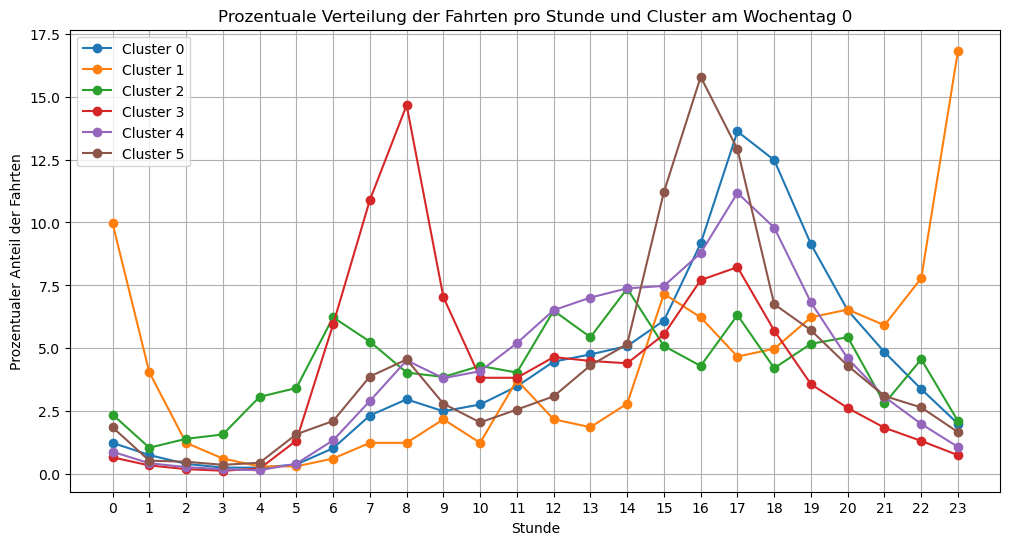

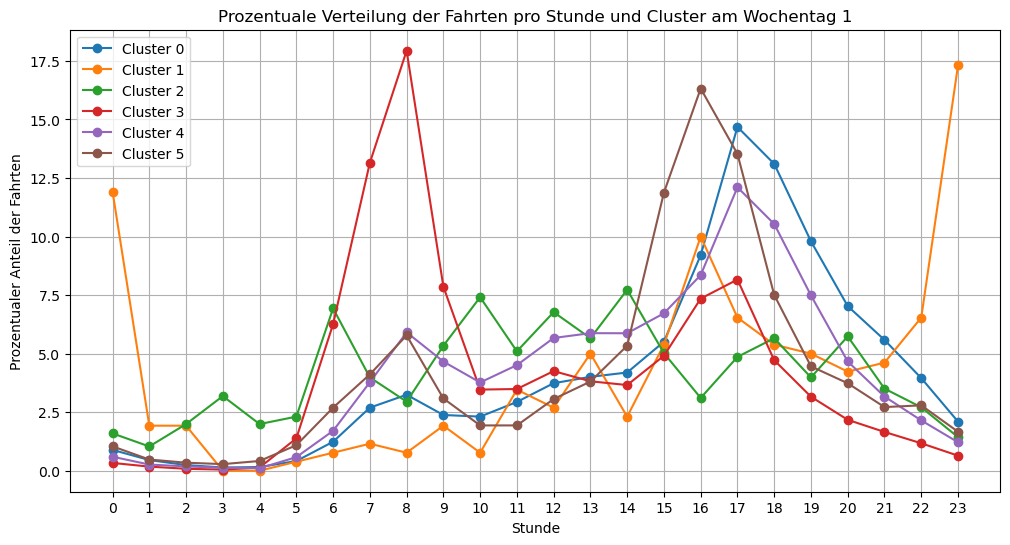

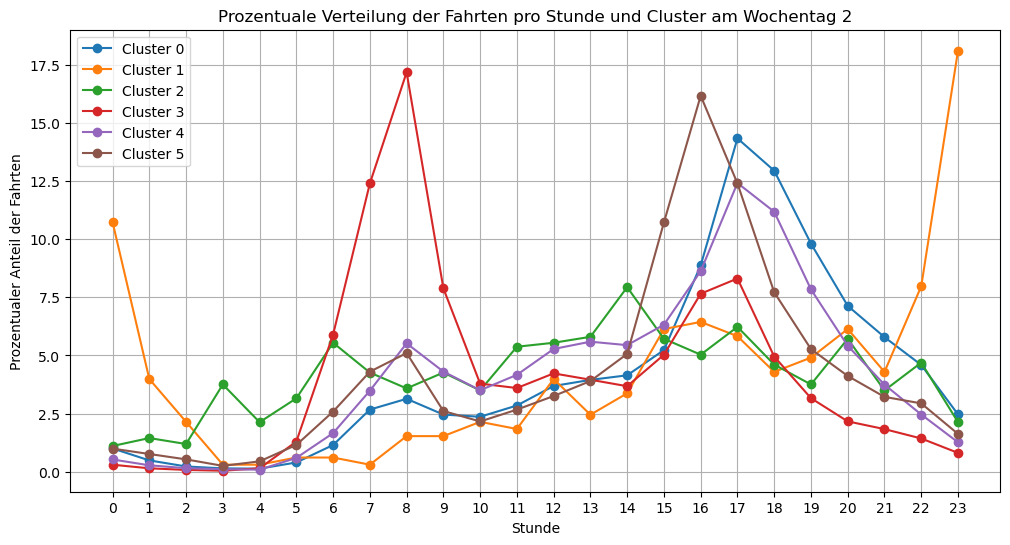

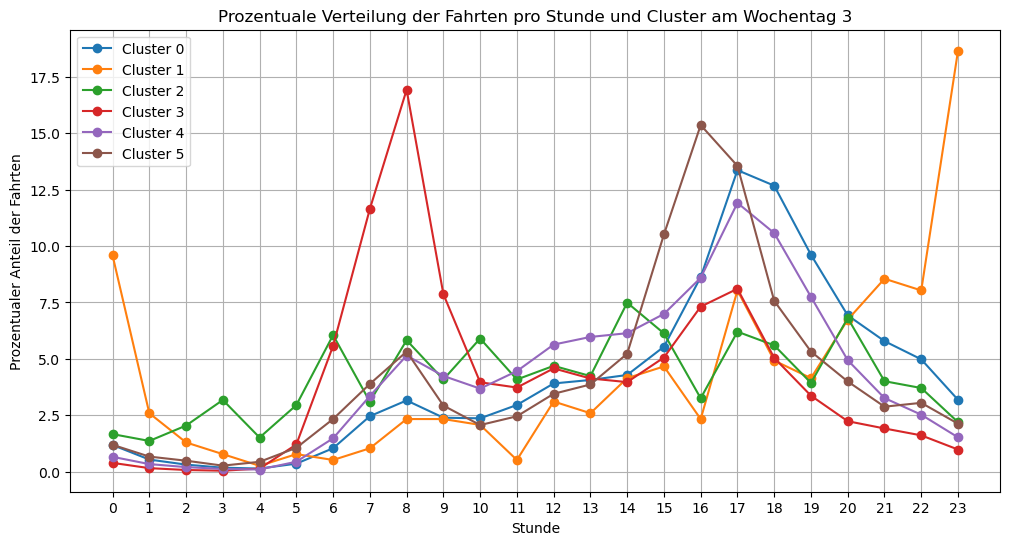

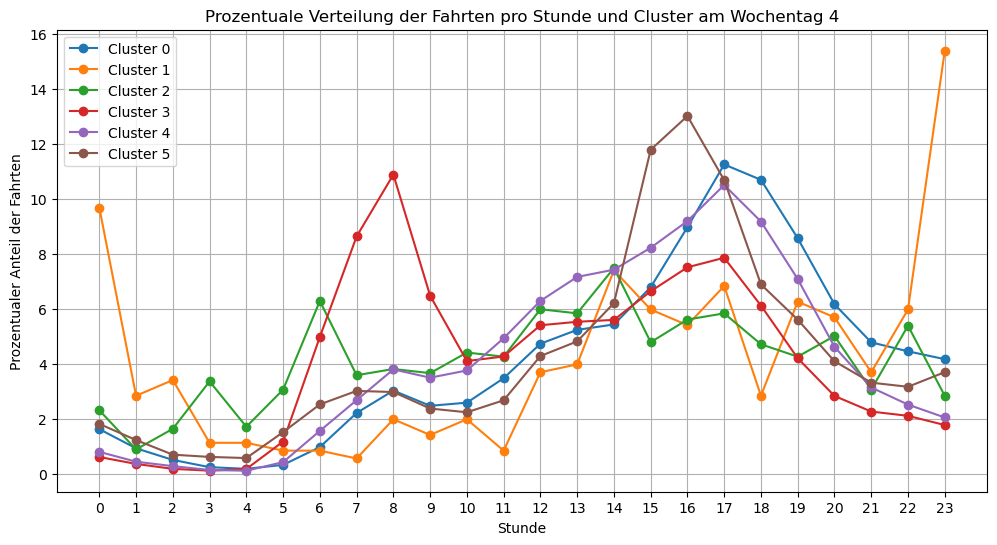

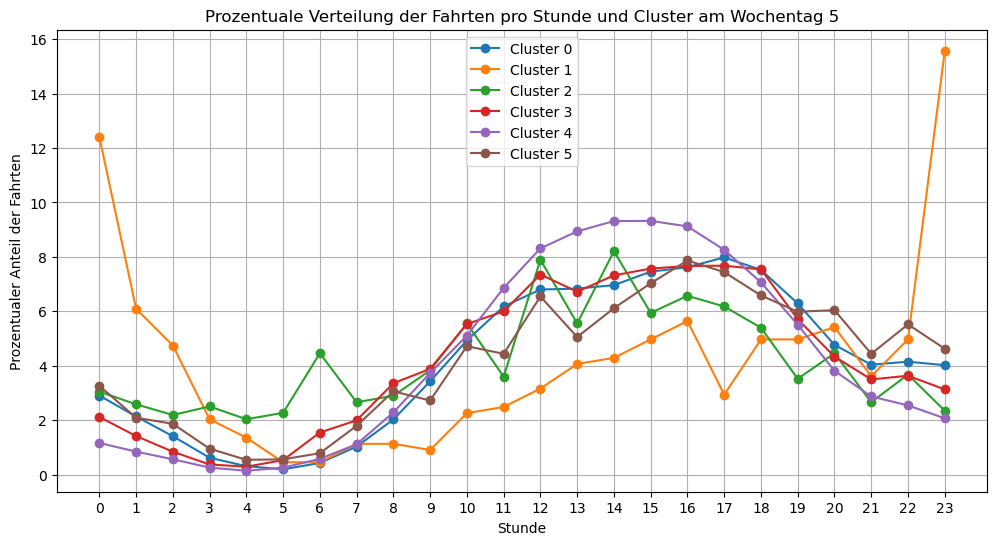

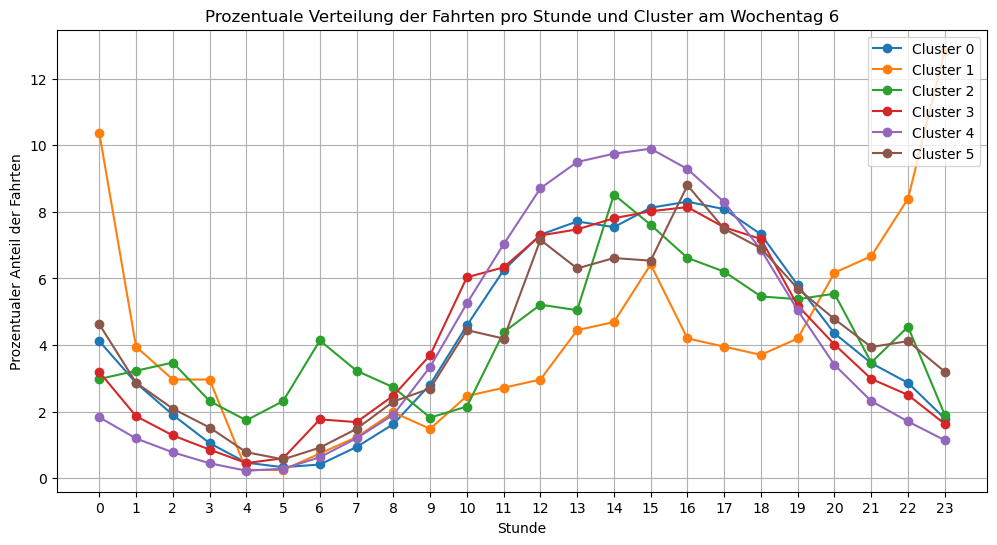

In [101]:
# 1. Gesamtzahl der Fahrten pro Cluster und Wochentag
total_rides_cluster_weekday = df.groupby(['cluster', 'weekday']).ride_id.count().reset_index(name='total_cluster_weekday_rides')

# 2. Stündliche Fahrten pro Cluster und Wochentag
hourly_rides_cluster_weekday = df.groupby(['cluster', 'weekday', 'hour']).ride_id.count().reset_index(name='hourly_cluster_rides')

# 3. Zusammenführen der Gesamt- und stündlichen Fahrten
merged_rides = pd.merge(hourly_rides_cluster_weekday, total_rides_cluster_weekday, on=['cluster', 'weekday'])

# 4. Prozentualen Anteil berechnen
merged_rides['percentage'] = (merged_rides['hourly_cluster_rides'] / merged_rides['total_cluster_weekday_rides']) * 100

# Umwandlung in ein Pivot-Table für das einfache Plotten
pivot_data = merged_rides.pivot_table(index=['hour', 'weekday'], columns='cluster', values='percentage', fill_value=0)

# Plotten
for weekday in range(7):  # Für jeden Wochentag
    plt.figure(figsize=(12, 6))
    for cluster in sorted(df['cluster'].unique()):
        if cluster in pivot_data.columns:  # Überprüfung, ob der Cluster vorhanden ist
            data_to_plot = pivot_data.xs(weekday, level='weekday')[cluster]
            plt.plot(data_to_plot.index, data_to_plot, label=f'Cluster {cluster}', marker='o')
        
    plt.title(f'Prozentuale Verteilung der Fahrten pro Stunde und Cluster am Wochentag {weekday}')
    plt.xlabel('Stunde')
    plt.ylabel('Prozentualer Anteil der Fahrten')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(24))  # Stellen Sie sicher, dass alle Stunden markiert sind
    plt.show()

In [100]:
# 1. Gesamtzahl der Fahrten pro Cluster und Wochentag
total_rides_cluster_weekday = df_k_4.groupby(['cluster', 'weekday']).ride_id.count().reset_index(name='total_cluster_weekday_rides')

# 2. Stündliche Fahrten pro Cluster und Wochentag
hourly_rides_cluster_weekday = df_k_4.groupby(['cluster', 'weekday', 'hour']).ride_id.count().reset_index(name='hourly_cluster_rides')

# 3. Zusammenführen der Gesamt- und stündlichen Fahrten
merged_rides = pd.merge(hourly_rides_cluster_weekday, total_rides_cluster_weekday, on=['cluster', 'weekday'])

# 4. Prozentualen Anteil berechnen
merged_rides['percentage'] = (merged_rides['hourly_cluster_rides'] / merged_rides['total_cluster_weekday_rides']) * 100

# Umwandlung in ein Pivot-Table für das einfache Plotten
pivot_data = merged_rides.pivot_table(index=['hour', 'weekday'], columns='cluster', values='percentage', fill_value=0)

# Plotten
for weekday in range(7):  # Für jeden Wochentag
    plt.figure(figsize=(12, 6))
    for cluster in sorted(df_k_4['cluster'].unique()):
        if cluster in pivot_data.columns:  # Überprüfung, ob der Cluster vorhanden ist
            data_to_plot = pivot_data.xs(weekday, level='weekday')[cluster]
            plt.plot(data_to_plot.index, data_to_plot, label=f'Cluster {cluster}', marker='o')
        
    plt.title(f'Prozentuale Verteilung der Fahrten pro Stunde und Cluster am Wochentag {weekday}')
    plt.xlabel('Stunde')
    plt.ylabel('Prozentualer Anteil der Fahrten')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(24))  # Stellen Sie sicher, dass alle Stunden markiert sind
    plt.show()

NameError: name 'df_k_4' is not defined

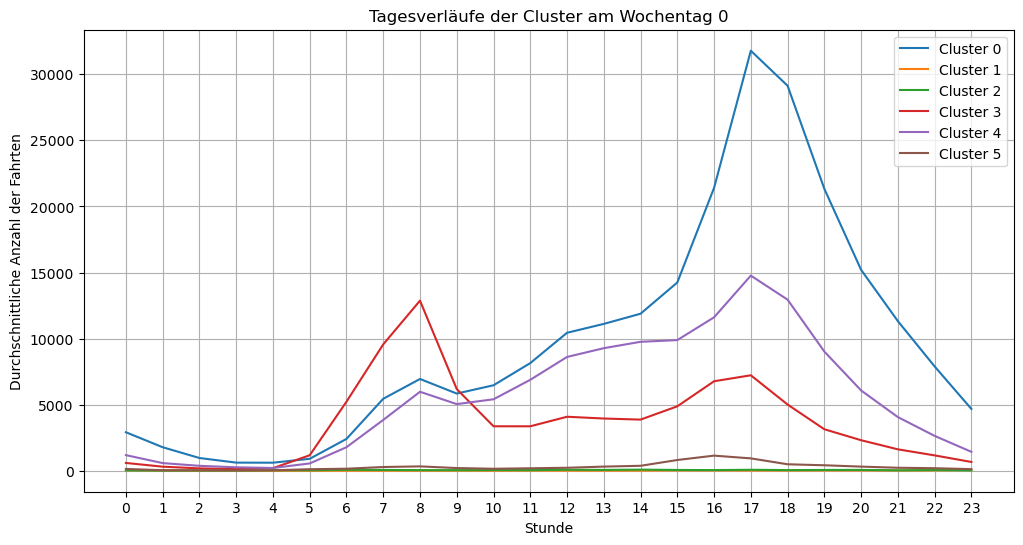

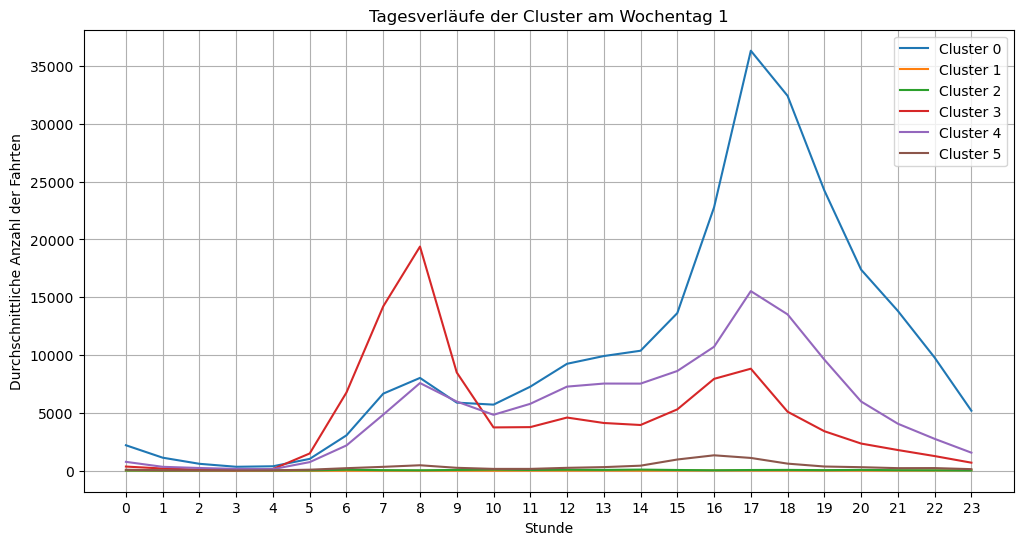

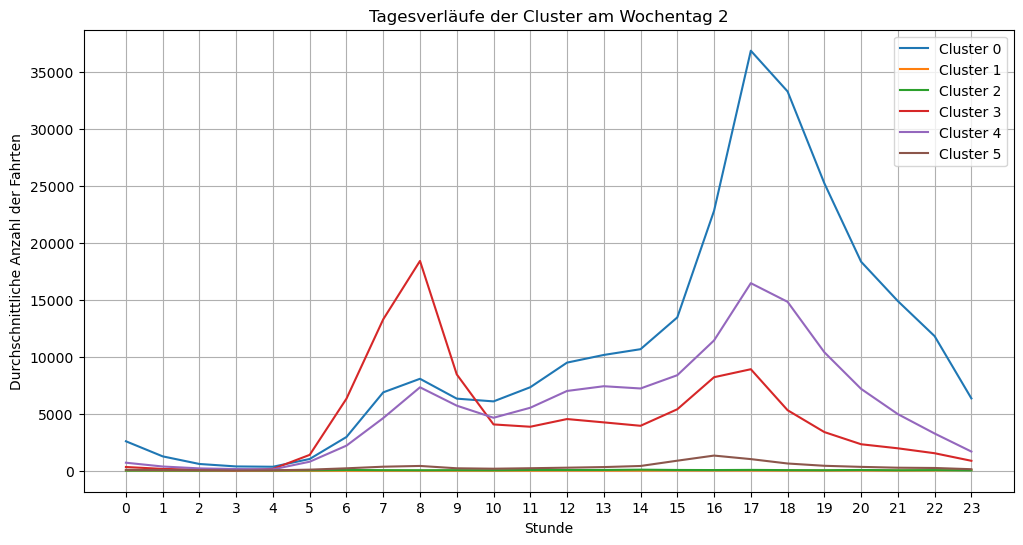

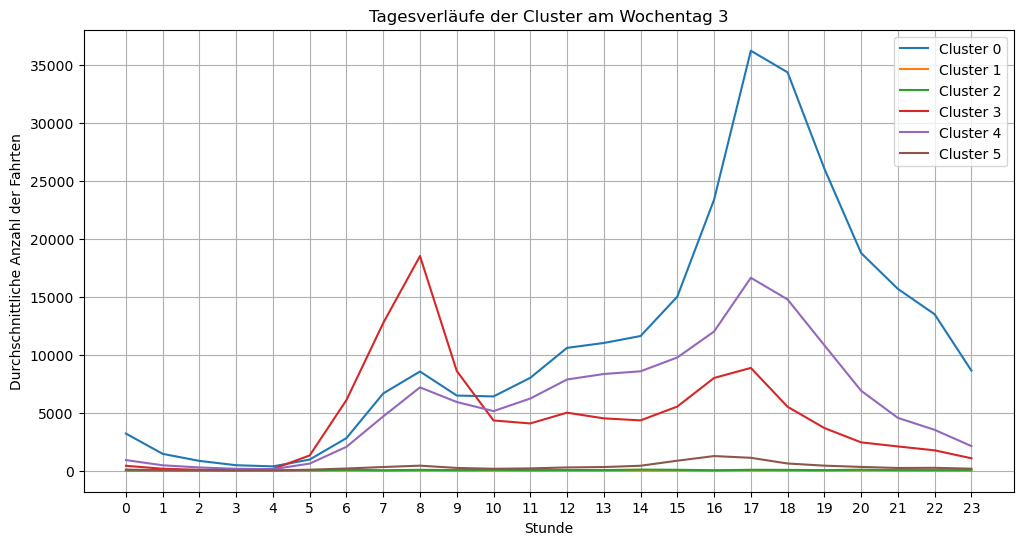

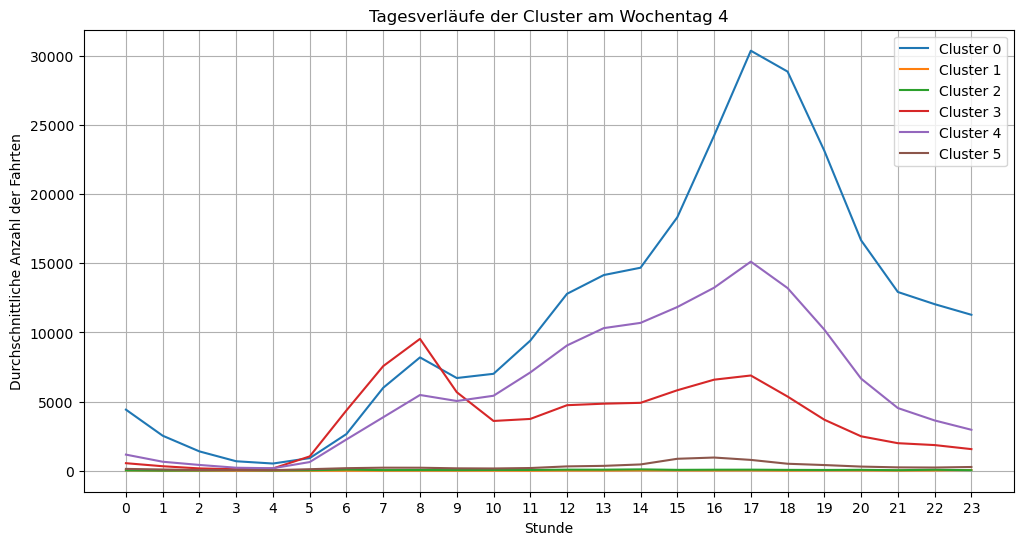

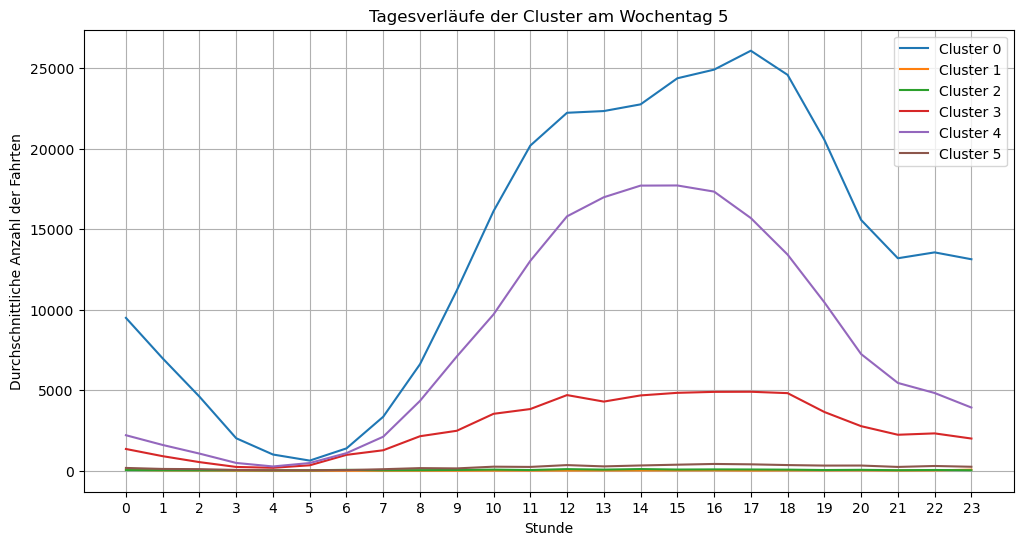

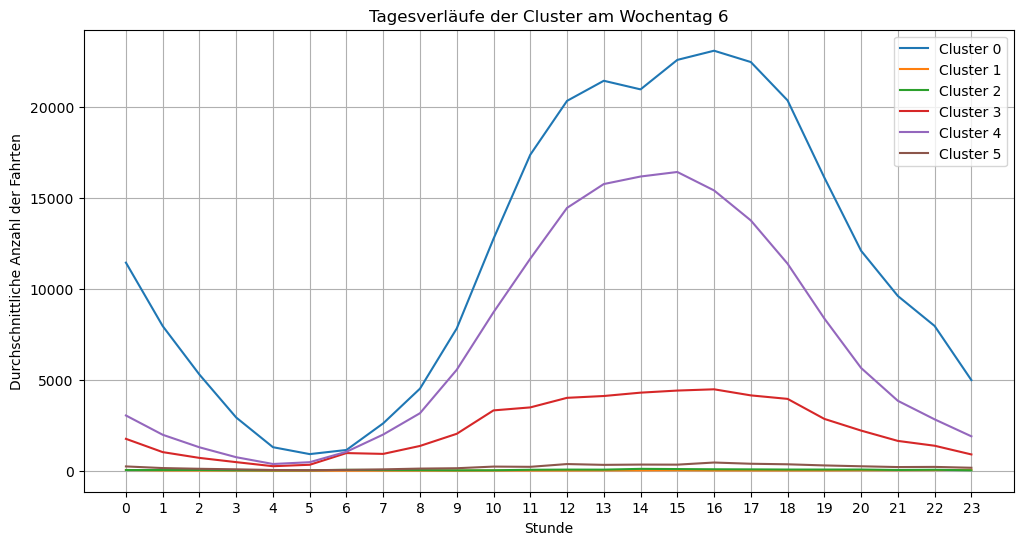

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Umwandlung der 'started_at' in datetime und Erstellung der 'hour' und 'weekday' Spalten, falls noch nicht vorhanden
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['hour'] = df['ended_at'].dt.hour
df['weekday'] = df['ended_at'].dt.weekday

# Aggregieren der Daten: Anzahl der Fahrten pro Stunde und Wochentag für jeden Cluster
agg_data = df.groupby(['cluster', 'weekday', 'hour']).ride_id.count().reset_index(name='ride_count')

# Umwandlung in ein Pivot-Table für das einfache Plotten
pivot_data = agg_data.pivot_table(index=['hour', 'weekday'], columns='cluster', values='ride_count', fill_value=0)

# Plotten
for weekday in range(7):  # Für jeden Wochentag
    plt.figure(figsize=(12, 6))
    for cluster in sorted(df['cluster'].unique()):
        data_to_plot = pivot_data.xs(weekday, level='weekday')[cluster]
        plt.plot(data_to_plot.index, data_to_plot, label=f'Cluster {cluster}')
        
    plt.title(f'Tagesverläufe der Cluster am Wochentag {weekday}')
    plt.xlabel('Stunde')
    plt.ylabel('Durchschnittliche Anzahl der Fahrten')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(24))  # Stellen Sie sicher, dass alle Stunden markiert sind
    plt.show()


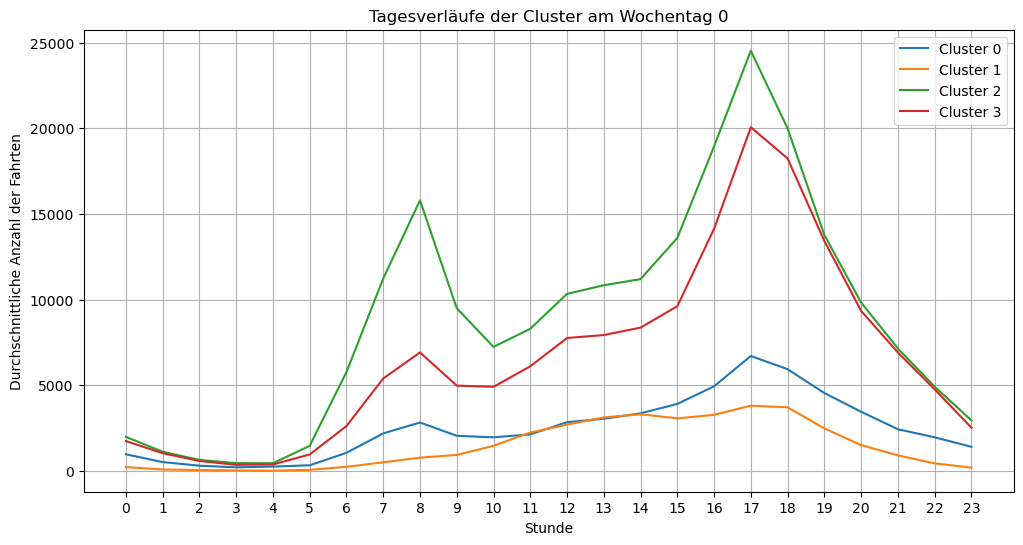

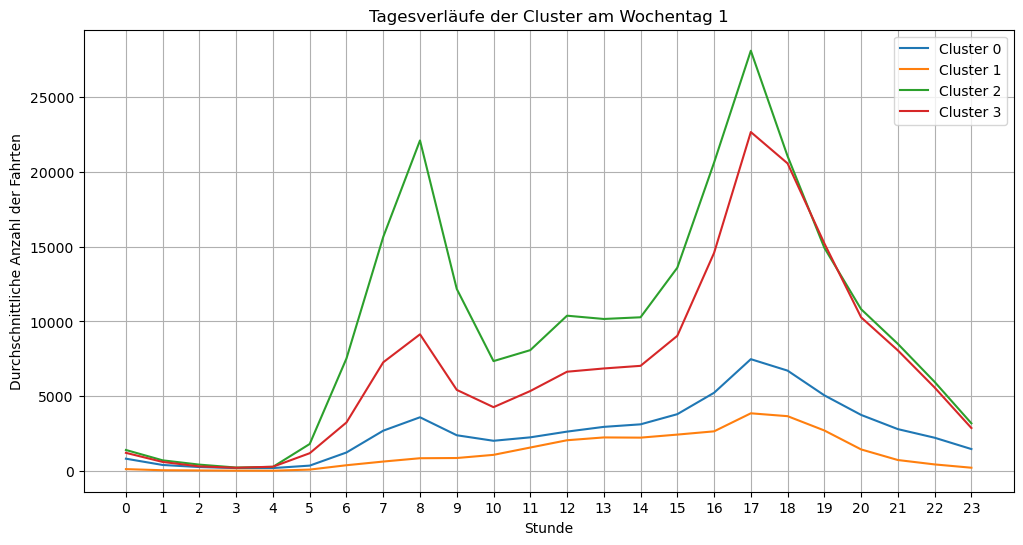

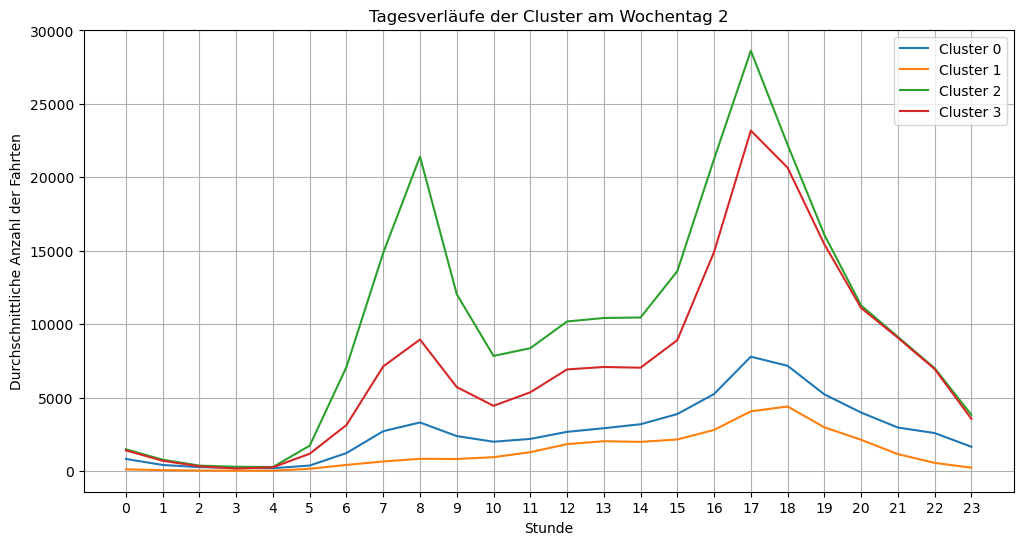

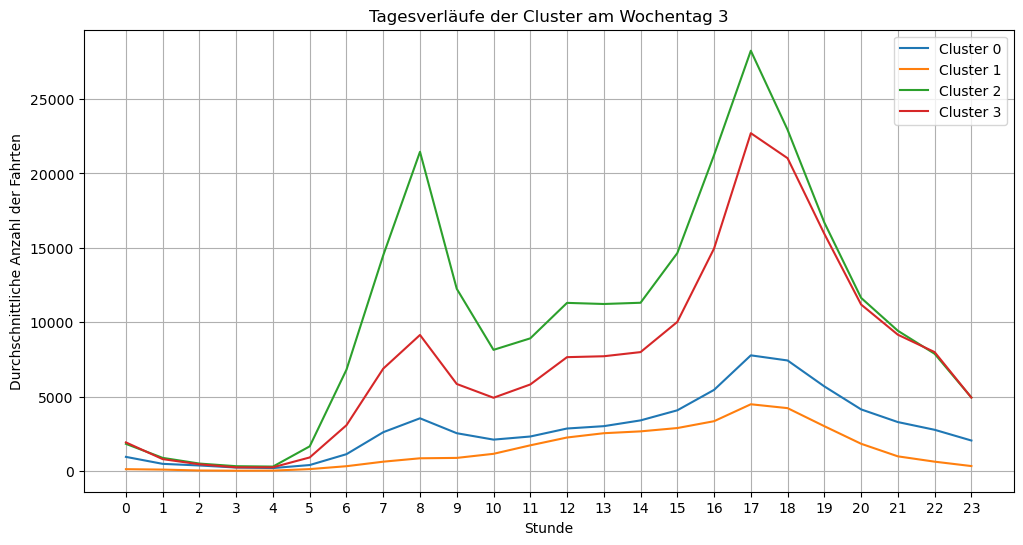

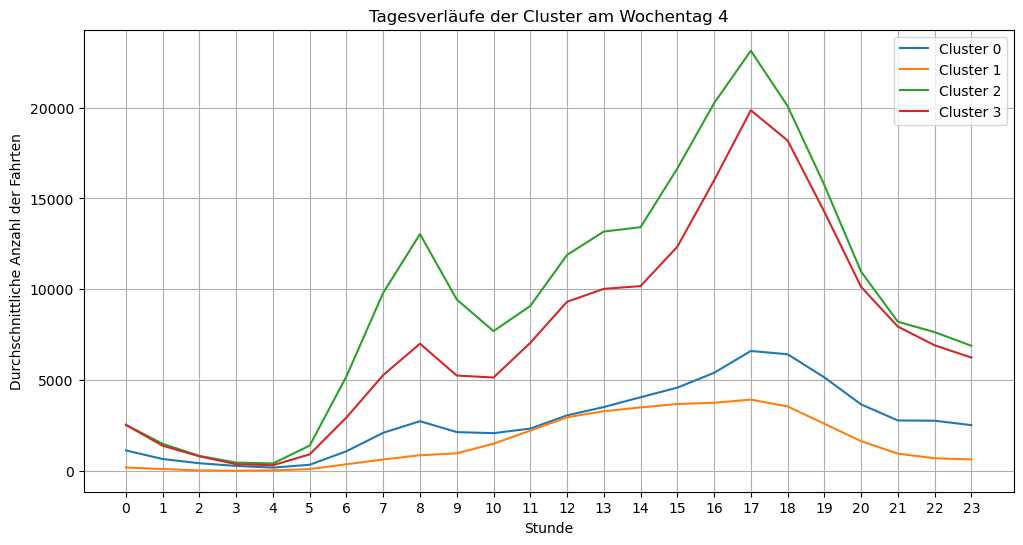

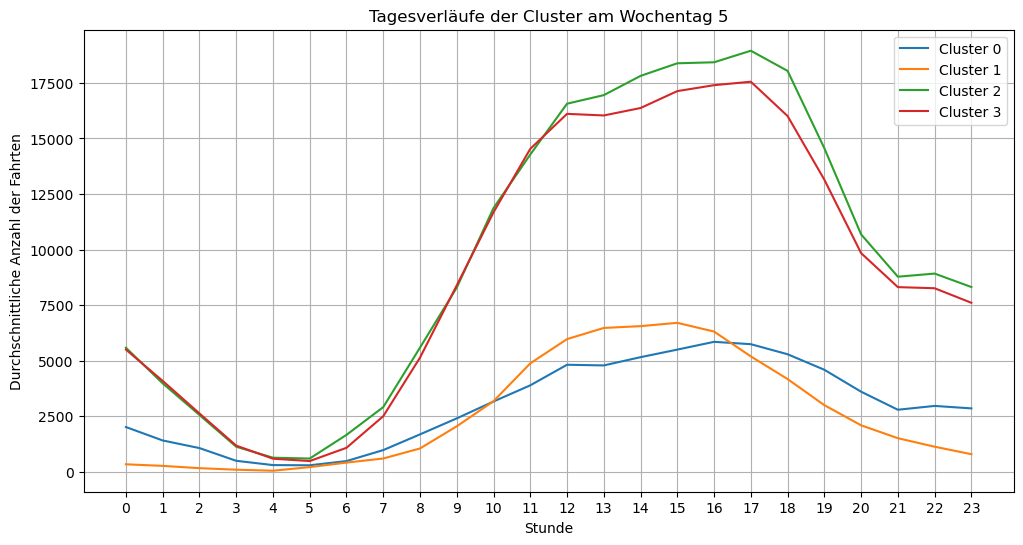

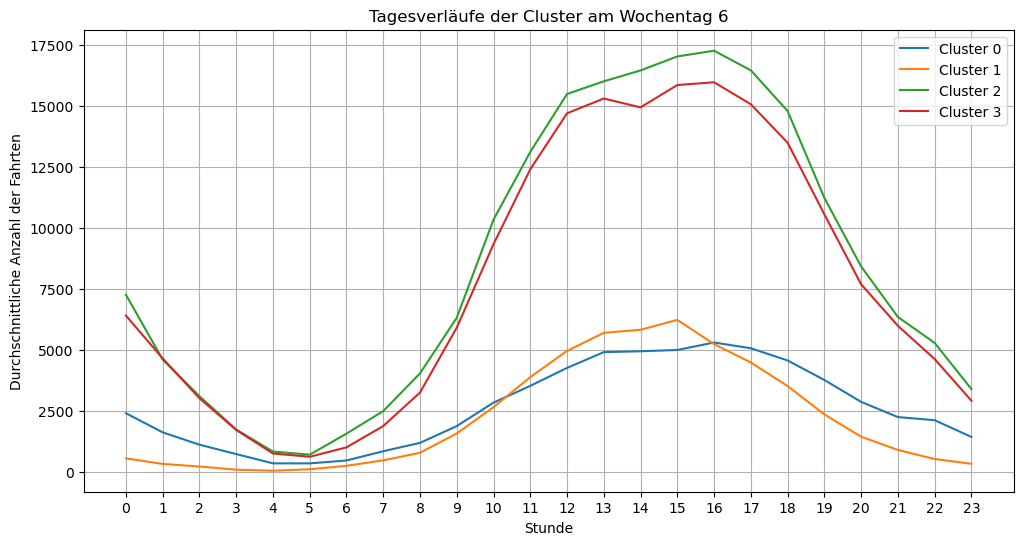

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Umwandlung der 'started_at' in datetime und Erstellung der 'hour' und 'weekday' Spalten, falls noch nicht vorhanden
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['hour'] = df_k_4['ended_at'].dt.hour
df['weekday'] = df_k_4['ended_at'].dt.weekday

# Aggregieren der Daten: Anzahl der Fahrten pro Stunde und Wochentag für jeden Cluster
agg_data = df_k_4.groupby(['cluster', 'weekday', 'hour']).ride_id.count().reset_index(name='ride_count')

# Umwandlung in ein Pivot-Table für das einfache Plotten
pivot_data = agg_data.pivot_table(index=['hour', 'weekday'], columns='cluster', values='ride_count', fill_value=0)

# Plotten
for weekday in range(7):  # Für jeden Wochentag
    plt.figure(figsize=(12, 6))
    for cluster in sorted(df_k_4['cluster'].unique()):
        data_to_plot = pivot_data.xs(weekday, level='weekday')[cluster]
        plt.plot(data_to_plot.index, data_to_plot, label=f'Cluster {cluster}')
        
    plt.title(f'Tagesverläufe der Cluster am Wochentag {weekday}')
    plt.xlabel('Stunde')
    plt.ylabel('Durchschnittliche Anzahl der Fahrten')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(24))  # Stellen Sie sicher, dass alle Stunden markiert sind
    plt.show()

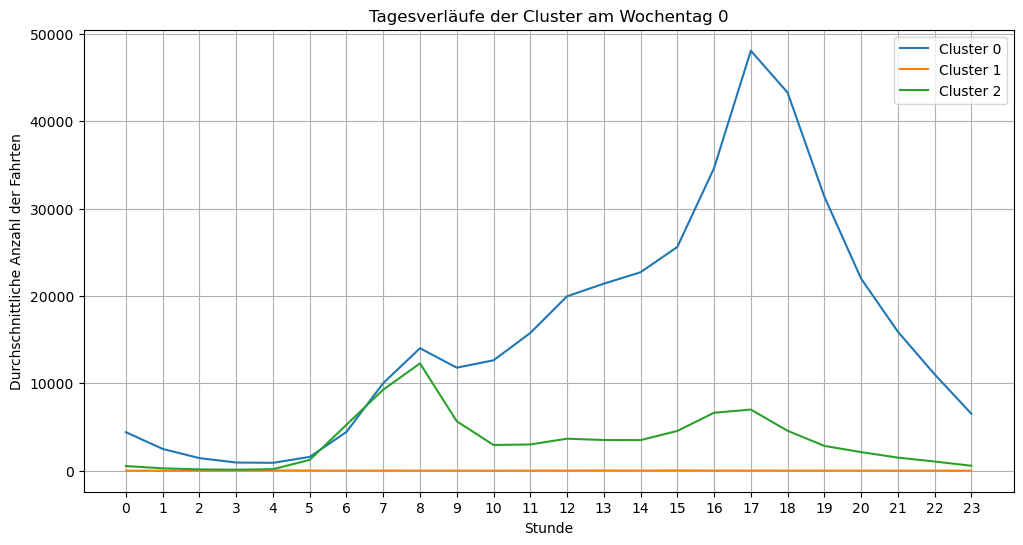

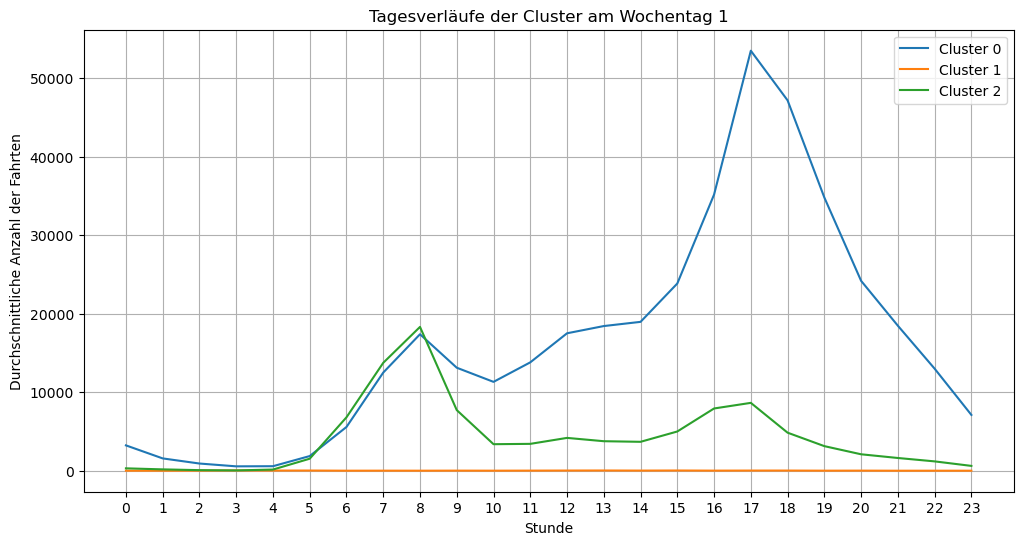

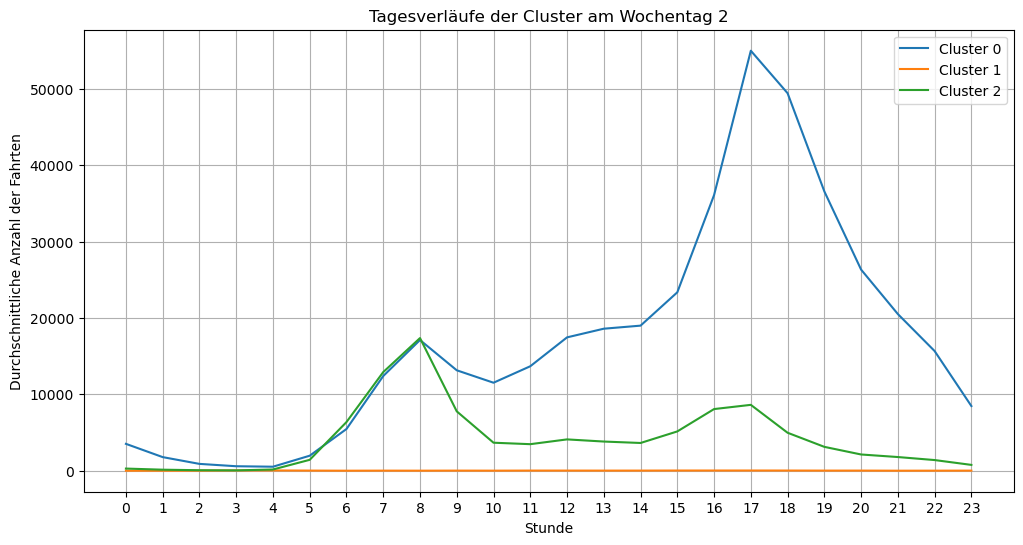

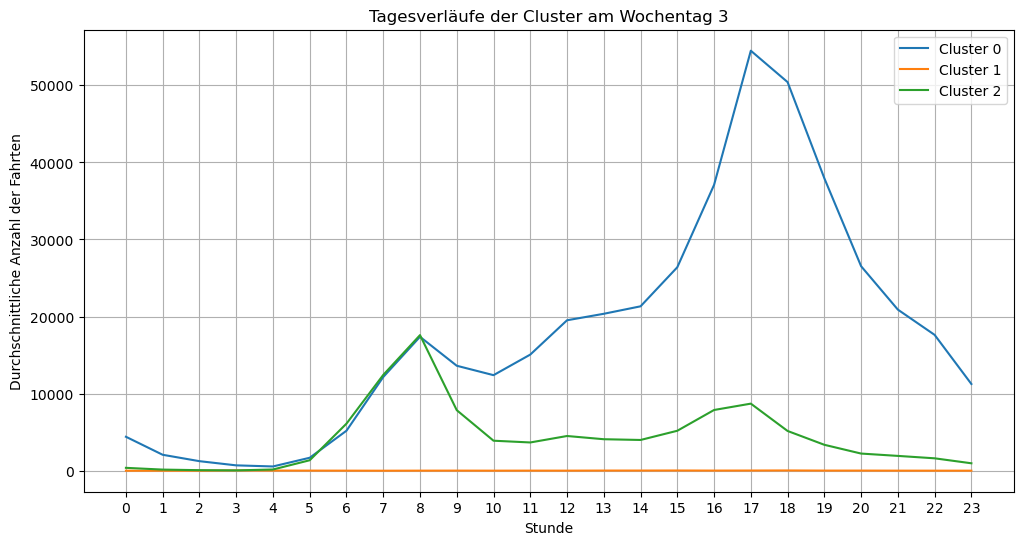

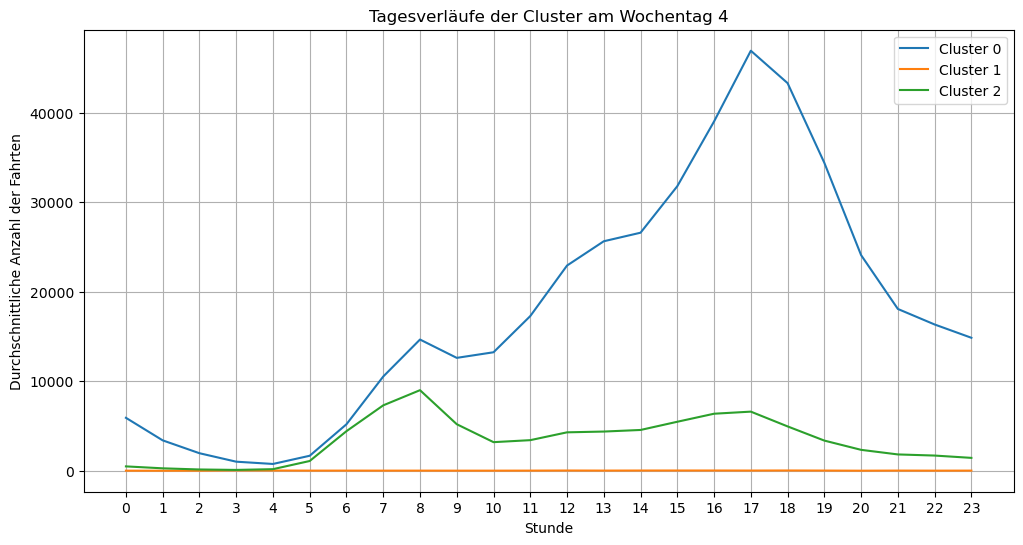

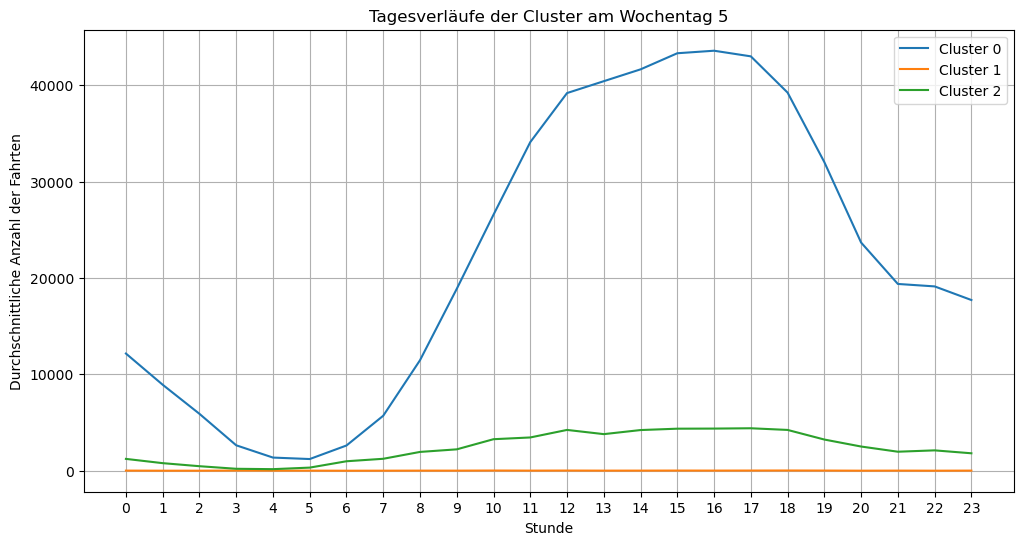

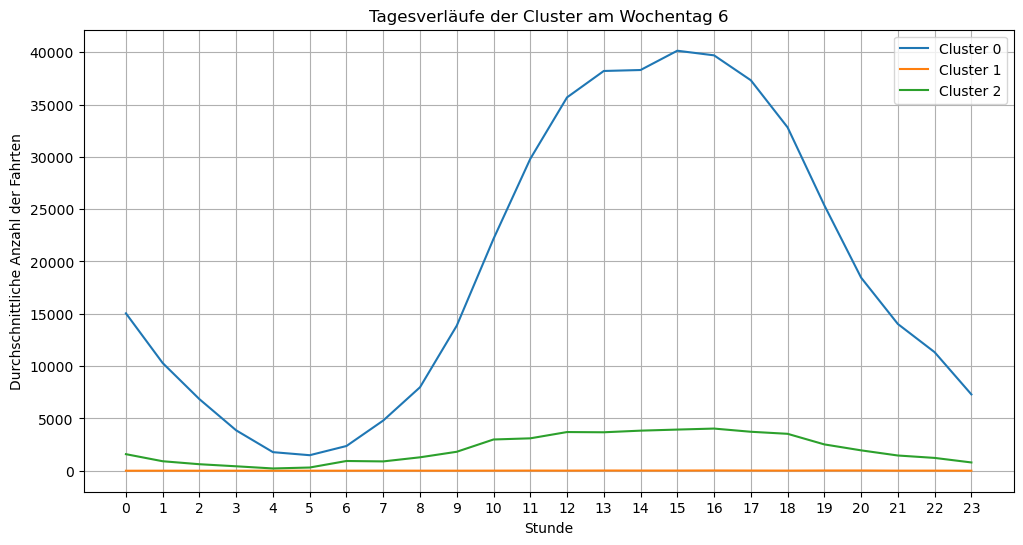

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Umwandlung der 'started_at' in datetime und Erstellung der 'hour' und 'weekday' Spalten, falls noch nicht vorhanden
df_2['ended_at'] = pd.to_datetime(df_2['ended_at'])
df_2['hour'] = df_2['ended_at'].dt.hour
df_2['weekday'] = df_2['ended_at'].dt.weekday

# Aggregieren der Daten: Anzahl der Fahrten pro Stunde und Wochentag für jeden Cluster
agg_data = df_2.groupby(['cluster', 'weekday', 'hour']).ride_id.count().reset_index(name='ride_count')

# Umwandlung in ein Pivot-Table für das einfache Plotten
pivot_data = agg_data.pivot_table(index=['hour', 'weekday'], columns='cluster', values='ride_count', fill_value=0)

# Plotten
for weekday in range(7):  # Für jeden Wochentag
    plt.figure(figsize=(12, 6))
    for cluster in sorted(df_2['cluster'].unique()):
        data_to_plot = pivot_data.xs(weekday, level='weekday')[cluster]
        plt.plot(data_to_plot.index, data_to_plot, label=f'Cluster {cluster}')
        
    plt.title(f'Tagesverläufe der Cluster am Wochentag {weekday}')
    plt.xlabel('Stunde')
    plt.ylabel('Durchschnittliche Anzahl der Fahrten')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(24))  # Stellen Sie sicher, dass alle Stunden markiert sind
    plt.show()


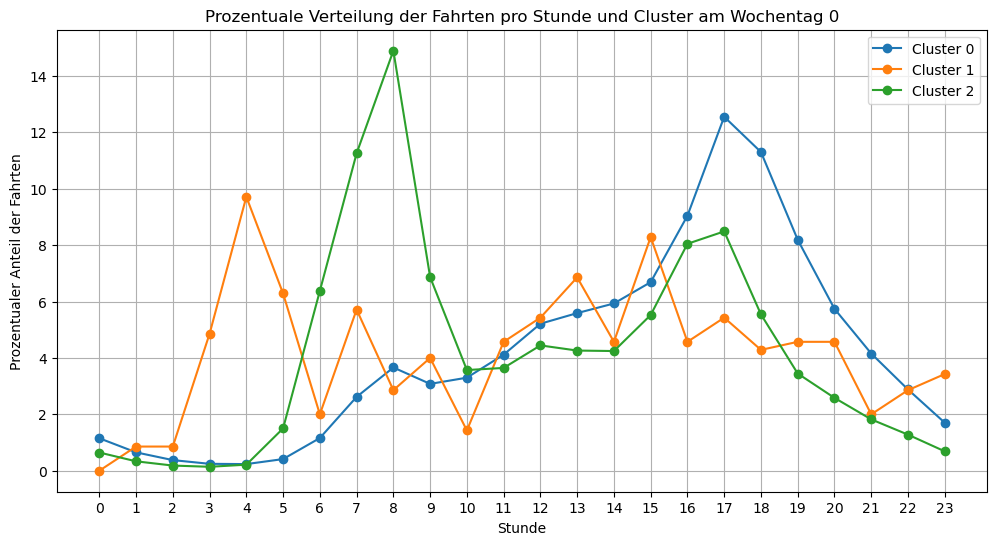

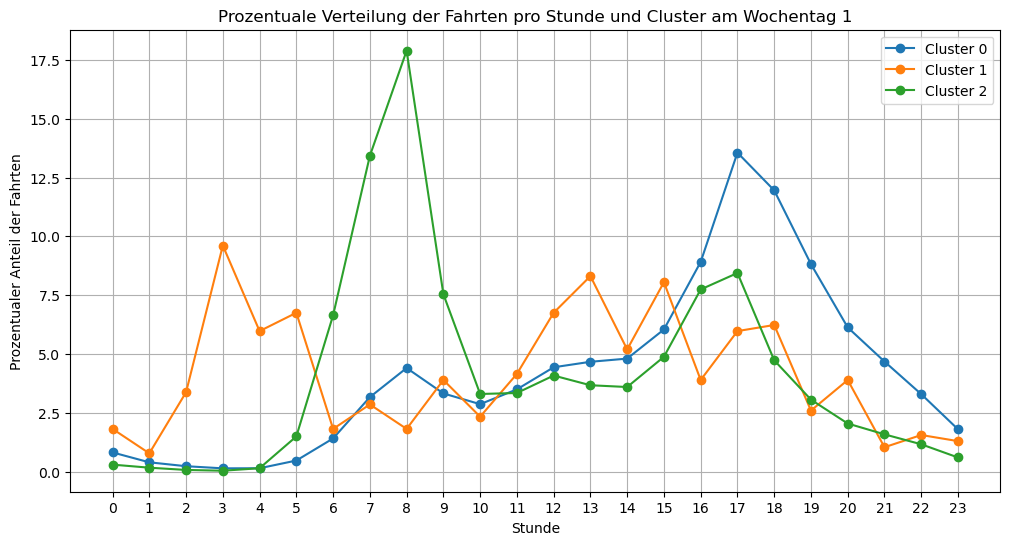

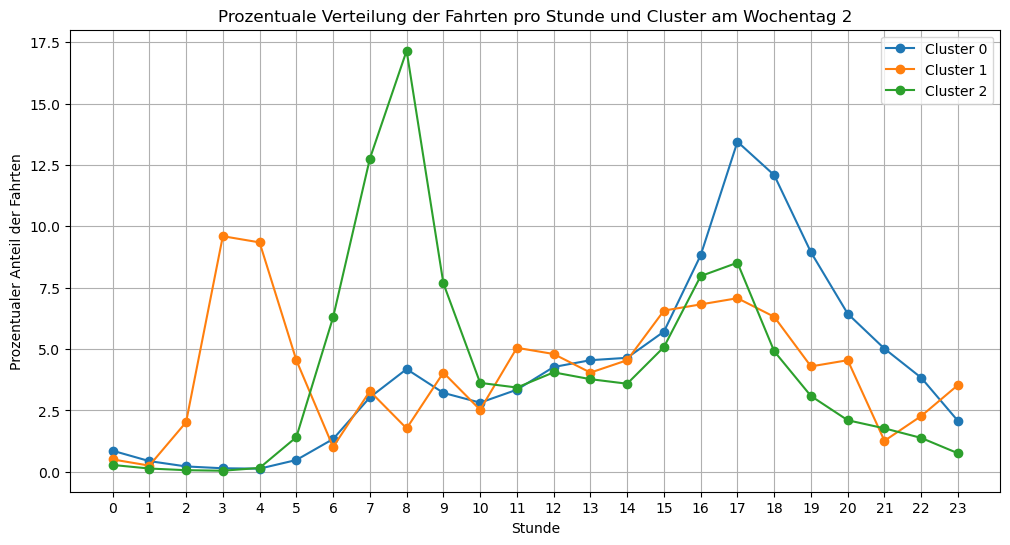

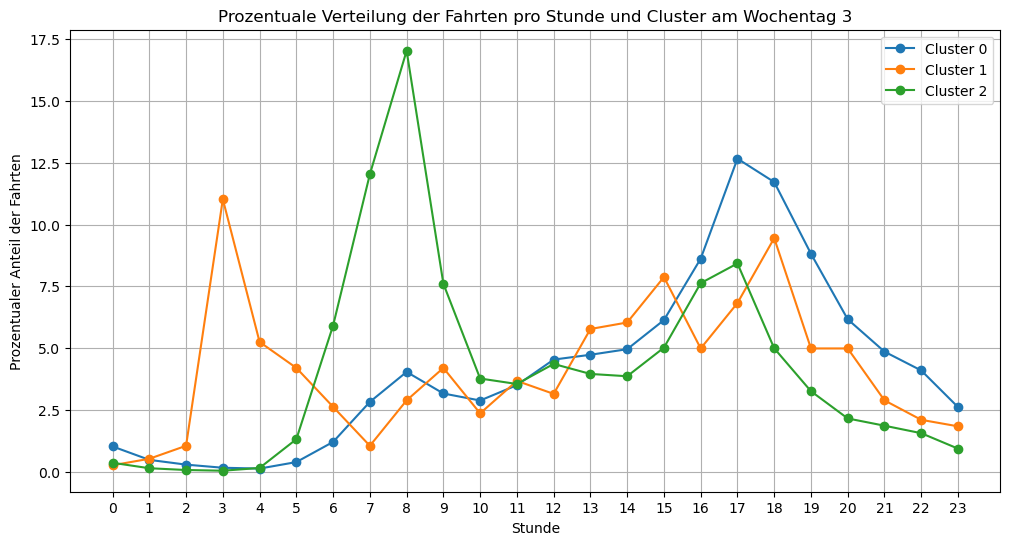

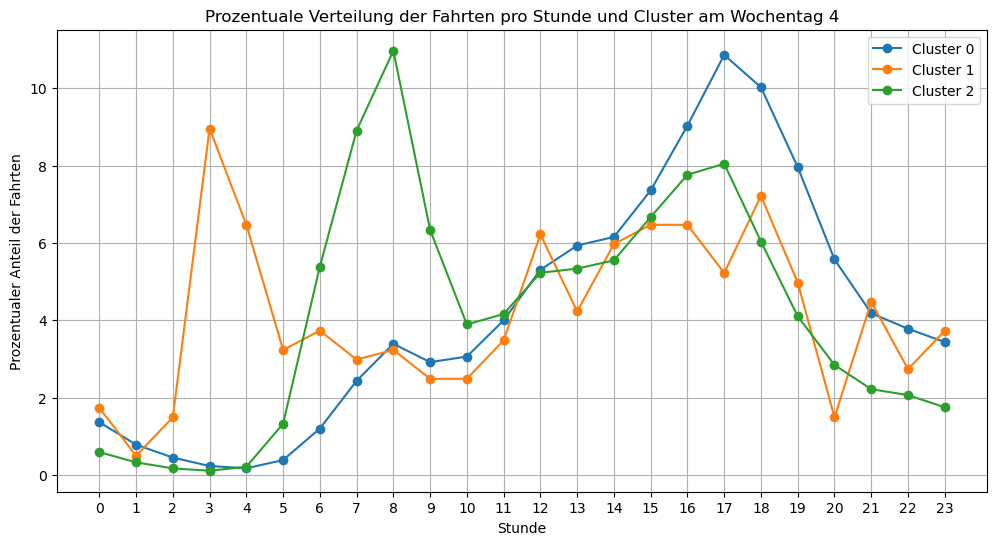

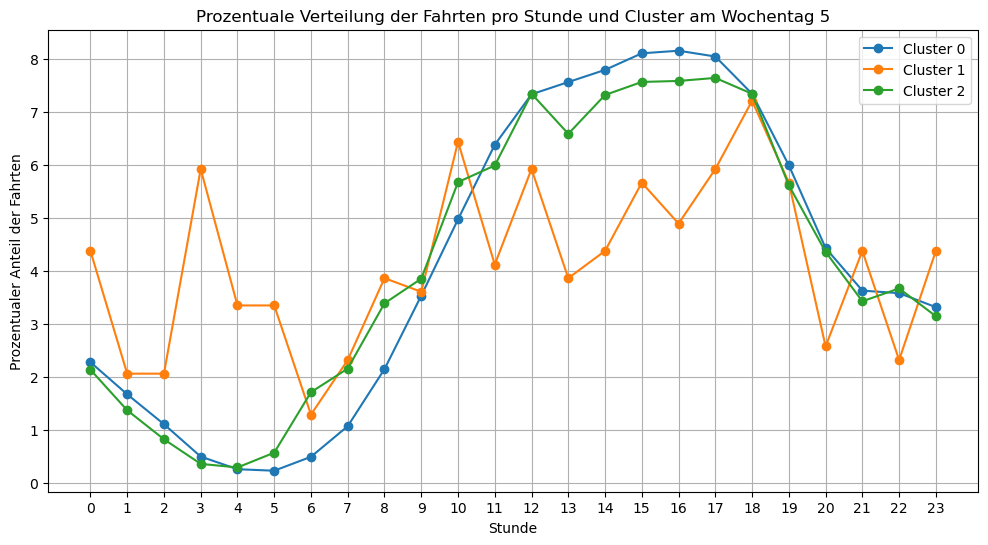

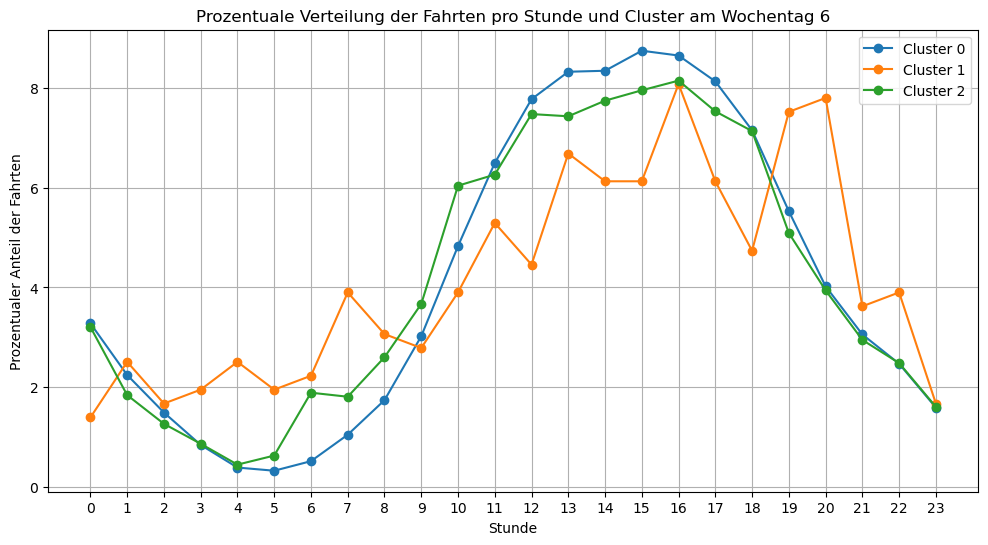

In [66]:
# 1. Gesamtzahl der Fahrten pro Cluster und Wochentag
total_rides_cluster_weekday = df_2.groupby(['cluster', 'weekday']).ride_id.count().reset_index(name='total_cluster_weekday_rides')

# 2. Stündliche Fahrten pro Cluster und Wochentag
hourly_rides_cluster_weekday = df_2.groupby(['cluster', 'weekday', 'hour']).ride_id.count().reset_index(name='hourly_cluster_rides')

# 3. Zusammenführen der Gesamt- und stündlichen Fahrten
merged_rides = pd.merge(hourly_rides_cluster_weekday, total_rides_cluster_weekday, on=['cluster', 'weekday'])

# 4. Prozentualen Anteil berechnen
merged_rides['percentage'] = (merged_rides['hourly_cluster_rides'] / merged_rides['total_cluster_weekday_rides']) * 100

# Umwandlung in ein Pivot-Table für das einfache Plotten
pivot_data = merged_rides.pivot_table(index=['hour', 'weekday'], columns='cluster', values='percentage', fill_value=0)

# Plotten
for weekday in range(7):  # Für jeden Wochentag
    plt.figure(figsize=(12, 6))
    for cluster in sorted(df_2['cluster'].unique()):
        if cluster in pivot_data.columns:  # Überprüfung, ob der Cluster vorhanden ist
            data_to_plot = pivot_data.xs(weekday, level='weekday')[cluster]
            plt.plot(data_to_plot.index, data_to_plot, label=f'Cluster {cluster}', marker='o')
        
    plt.title(f'Prozentuale Verteilung der Fahrten pro Stunde und Cluster am Wochentag {weekday}')
    plt.xlabel('Stunde')
    plt.ylabel('Prozentualer Anteil der Fahrten')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(24))  # Stellen Sie sicher, dass alle Stunden markiert sind
    plt.show()


In [24]:
unique_stations

end_station_id    index           ride_id  rideable_type  \
0            021320    63163  D2388B91DBAA4B3E  electric_bike   
1              1011  1573241  7209DA74F0A5B961  electric_bike   
2              1012  1538346  8A6CD8D6567E45AD  electric_bike   
3              1013  1493729  6DCF5CF55FC9F00D  electric_bike   
4              1015  2293872  690FA7CBBD2D95A7  electric_bike   
...             ...      ...               ...            ...   
1017  chargingstx07  4273602  9CE61EF14755D342  electric_bike   
1018   chargingstx1      411  7B0EA0134C7F227D  electric_bike   
1019   chargingstx3     3587  9F3E7293FCFBF16D   classic_bike   
1020   chargingstx4     7512  BF4DFF44359E02BB   classic_bike   
1021   chargingstx5      163  6D23D2F48E251B30   classic_bike   

               started_at             ended_at  \
0     2022-05-23 06:19:07  2022-05-23 06:31:38   
1     2022-07-11 08:21:53  2022-07-11 08:44:14   
2     2022-07-09 19:54:28  2022-07-09 20:08:54   
3     2022-07-26 18:18:00  2022-07-26 18:27:55   
4     2022-08-03 21:19:06  2022-08-03 21:43:32   
...                   ...                  ...   
1017  2022-11-18 09:58:44  2022-11-18 10:05:27   
1018  2022-05-22 16:10:00  2022-05-22 16:41:40   
1019  2022-05-12 17:29:00  2022-05-12 17:40:16   
1020  2022-05-12 06:45:33  2022-05-12 08:07:49   
1021  2022-05-11 10:44:04  2022-05-11 10:51:35   

                          start_station_name start_station_id  \
0                                 Walsh Park            18067   
1                  Narragansett & Wrightwood              314   
2            Blackstone Ave & Hyde Park Blvd            13398   
3     Public Rack - Keystone Ave & North Ave              518   
4                     Clark St & Elmdale Ave     KA1504000148   
...                                      ...              ...   
1017           Franklin St & Adams St (Temp)     TA1309000008   
1018                 Hermitage Ave & Polk St            13080   
1019                 Canal St & Jackson Blvd            13138   
1020                   Franklin St & Lake St     TA1307000111   
1021                Lincoln Ave & Roscoe St*     chargingstx5   

                                    end_station_name  start_lat  start_lng  \
0                                     MTV Hubbard St  41.914518 -87.667852   
1     Public Rack - Fullerton Ave & Narragansett Ave  41.930000 -87.790000   
2                Public Rack - Langley Ave & 49th St  41.802594 -87.590205   
3                 Public Rack - Pulaski Rd & Lake St  41.910000 -87.730000   
4             Public Rack - Peterson Ave & Drake Ave  41.990912 -87.669740   
...                                              ...        ...        ...   
1017                         Green St & Madison Ave*  41.879063 -87.635010   
1018                      Bissell St & Armitage Ave*  41.871537 -87.669970   
1019                         Green St & Randolph St*  41.877245 -87.639366   
1020                            Morgan St & Lake St*  41.885837 -87.635500   
1021                        Lincoln Ave & Roscoe St*  41.943350 -87.670668   

        end_lat    end_lng member_casual  cluster  
0     41.890000 -87.680000        member        1  
1     41.920000 -87.790000        casual        1  
2     41.810000 -87.610000        casual        1  
3     41.890000 -87.730000        casual        1  
4     41.990000 -87.720000        casual        1  
...         ...        ...           ...      ...  
1017  41.881827 -87.648832        member        1  
1018  41.918296 -87.652183        casual        0  
1019  41.883602 -87.648627        casual        0  
1020  41.885492 -87.652289        member        0  
1021  41.943350 -87.670668        member        0  

[1012 rows x 15 columns]

In [49]:
unique_stations

end_station_id    index           ride_id  rideable_type  \
0           021320    63163  D2388B91DBAA4B3E  electric_bike   
1             1011  1573241  7209DA74F0A5B961  electric_bike   
2             1012  1538346  8A6CD8D6567E45AD  electric_bike   
3             1013  1493729  6DCF5CF55FC9F00D  electric_bike   
4             1015  2293872  690FA7CBBD2D95A7  electric_bike   
..             ...      ...               ...            ...   
889  chargingstx07  4273602  9CE61EF14755D342  electric_bike   
890   chargingstx1      411  7B0EA0134C7F227D  electric_bike   
891   chargingstx3     3587  9F3E7293FCFBF16D   classic_bike   
892   chargingstx4     7512  BF4DFF44359E02BB   classic_bike   
893   chargingstx5      163  6D23D2F48E251B30   classic_bike   

              started_at             ended_at  \
0    2022-05-23 06:19:07  2022-05-23 06:31:38   
1    2022-07-11 08:21:53  2022-07-11 08:44:14   
2    2022-07-09 19:54:28  2022-07-09 20:08:54   
3    2022-07-26 18:18:00  2022-07-26 18:27:55   
4    2022-08-03 21:19:06  2022-08-03 21:43:32   
..                   ...                  ...   
889  2022-11-18 09:58:44  2022-11-18 10:05:27   
890  2022-05-22 16:10:00  2022-05-22 16:41:40   
891  2022-05-12 17:29:00  2022-05-12 17:40:16   
892  2022-05-12 06:45:33  2022-05-12 08:07:49   
893  2022-05-11 10:44:04  2022-05-11 10:51:35   

                         start_station_name start_station_id  \
0                                Walsh Park            18067   
1                 Narragansett & Wrightwood              314   
2           Blackstone Ave & Hyde Park Blvd            13398   
3    Public Rack - Keystone Ave & North Ave              518   
4                    Clark St & Elmdale Ave     KA1504000148   
..                                      ...              ...   
889           Franklin St & Adams St (Temp)     TA1309000008   
890                 Hermitage Ave & Polk St            13080   
891                 Canal St & Jackson Blvd            13138   
892                   Franklin St & Lake St     TA1307000111   
893                Lincoln Ave & Roscoe St*     chargingstx5   

                                   end_station_name  start_lat  start_lng  \
0                                    MTV Hubbard St  41.914518 -87.667852   
1    Public Rack - Fullerton Ave & Narragansett Ave  41.930000 -87.790000   
2               Public Rack - Langley Ave & 49th St  41.802594 -87.590205   
3                Public Rack - Pulaski Rd & Lake St  41.910000 -87.730000   
4            Public Rack - Peterson Ave & Drake Ave  41.990912 -87.669740   
..                                              ...        ...        ...   
889                         Green St & Madison Ave*  41.879063 -87.635010   
890                      Bissell St & Armitage Ave*  41.871537 -87.669970   
891                         Green St & Randolph St*  41.877245 -87.639366   
892                            Morgan St & Lake St*  41.885837 -87.635500   
893                        Lincoln Ave & Roscoe St*  41.943350 -87.670668   

       end_lat    end_lng member_casual  cluster  
0    41.890000 -87.680000        member        1  
1    41.920000 -87.790000        casual        1  
2    41.810000 -87.610000        casual        1  
3    41.890000 -87.730000        casual        1  
4    41.990000 -87.720000        casual        1  
..         ...        ...           ...      ...  
889  41.881827 -87.648832        member        1  
890  41.918296 -87.652183        casual        0  
891  41.883602 -87.648627        casual        0  
892  41.885492 -87.652289        member        0  
893  41.943350 -87.670668        member        0  

[883 rows x 15 columns]

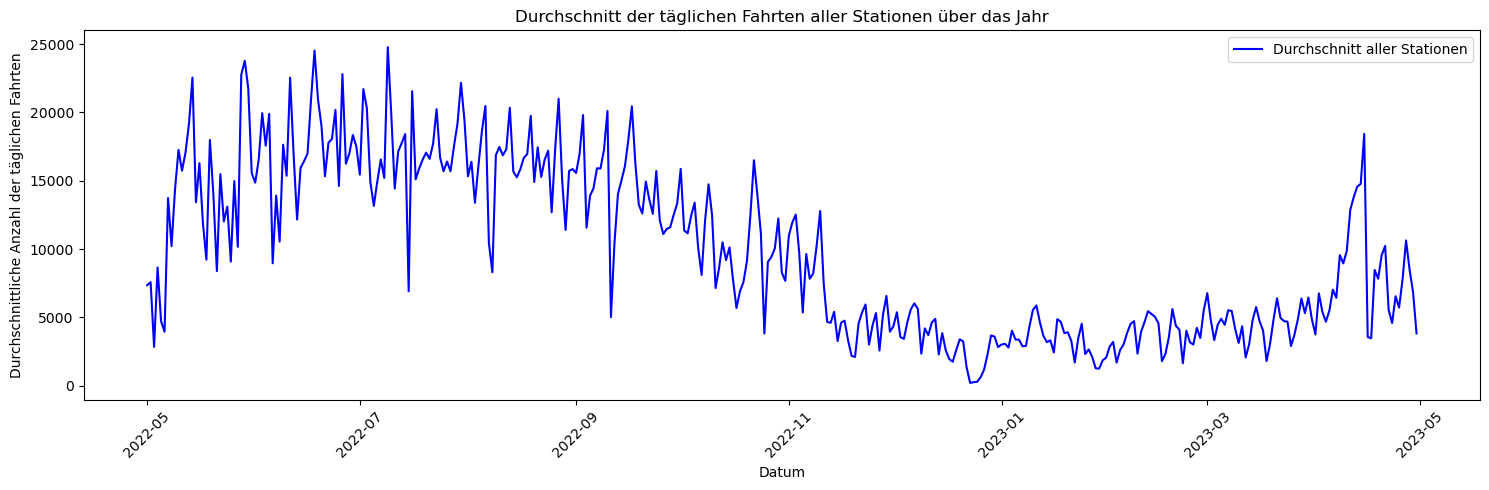

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame und enthält bereits die erforderlichen Spalten 'started_at' und 'end_station_id'

# Umwandlung der 'started_at' Spalte in datetime, falls noch nicht geschehen
df['started_at'] = pd.to_datetime(df['started_at'])

# Extrahierung des Datums (ohne Zeit) für jede Fahrt
df['date'] = df['started_at'].dt.date

# Aggregation der täglichen Fahrten für alle Stationen und Berechnung des Durchschnitts
daily_rides_average = df.groupby('date').size().reset_index(name='daily_rides_average')

# Erstellen des Schaubilds für den Durchschnitt der täglichen Fahrten aller Stationen
plt.figure(figsize=(15, 5))
plt.plot(daily_rides_average['date'], daily_rides_average['daily_rides_average'], label='Durchschnitt aller Stationen', linestyle='-', color='blue')
plt.title('Durchschnitt der täglichen Fahrten aller Stationen über das Jahr')
plt.xlabel('Datum')
plt.ylabel('Durchschnittliche Anzahl der täglichen Fahrten')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



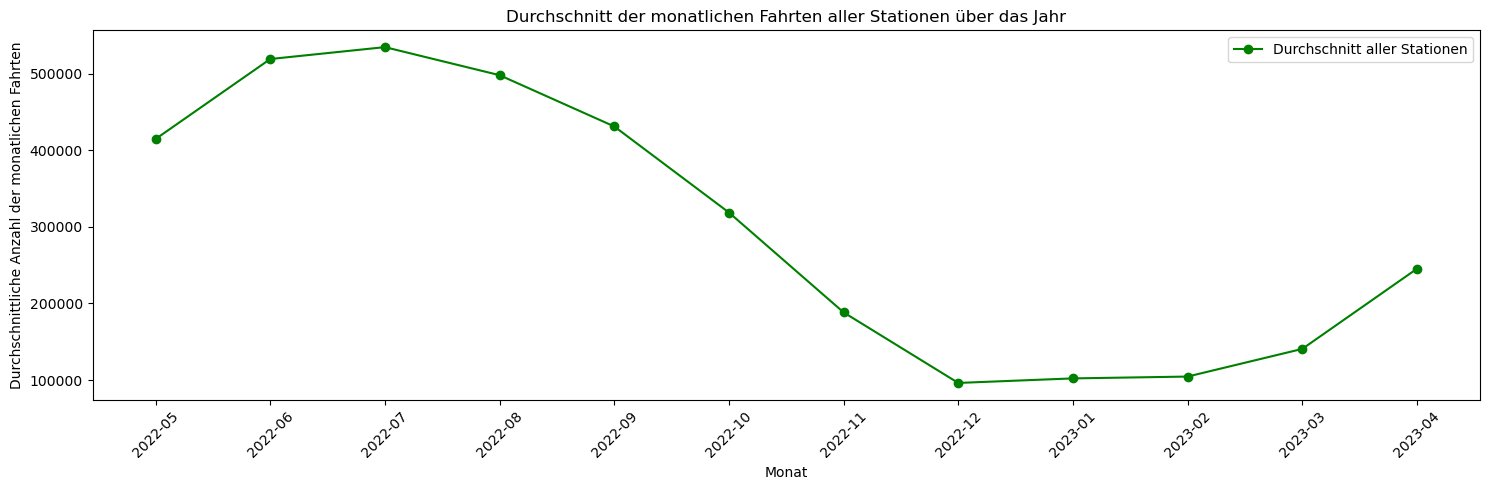

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Angenommen, df ist dein DataFrame und enthält bereits die erforderliche Spalte 'started_at'

# Umwandlung der 'started_at' Spalte in datetime, falls noch nicht geschehen
df['started_at'] = pd.to_datetime(df['started_at'])

# Extrahierung des Monats und Jahres für jede Fahrt
df['year_month'] = df['started_at'].dt.to_period('M')

# Aggregation der monatlichen Fahrten für alle Stationen und Berechnung des Durchschnitts
monthly_rides_average = df.groupby('year_month').size().reset_index(name='monthly_rides_average')

# Konvertierung von 'year_month' von Period zu String für die Darstellung
monthly_rides_average['year_month'] = monthly_rides_average['year_month'].astype(str)

# Erstellen des Schaubilds für den Durchschnitt der monatlichen Fahrten aller Stationen
plt.figure(figsize=(15, 5))
plt.plot(monthly_rides_average['year_month'], monthly_rides_average['monthly_rides_average'], label='Durchschnitt aller Stationen', marker='o', linestyle='-', color='green')
plt.title('Durchschnitt der monatlichen Fahrten aller Stationen über das Jahr')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Anzahl der monatlichen Fahrten')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


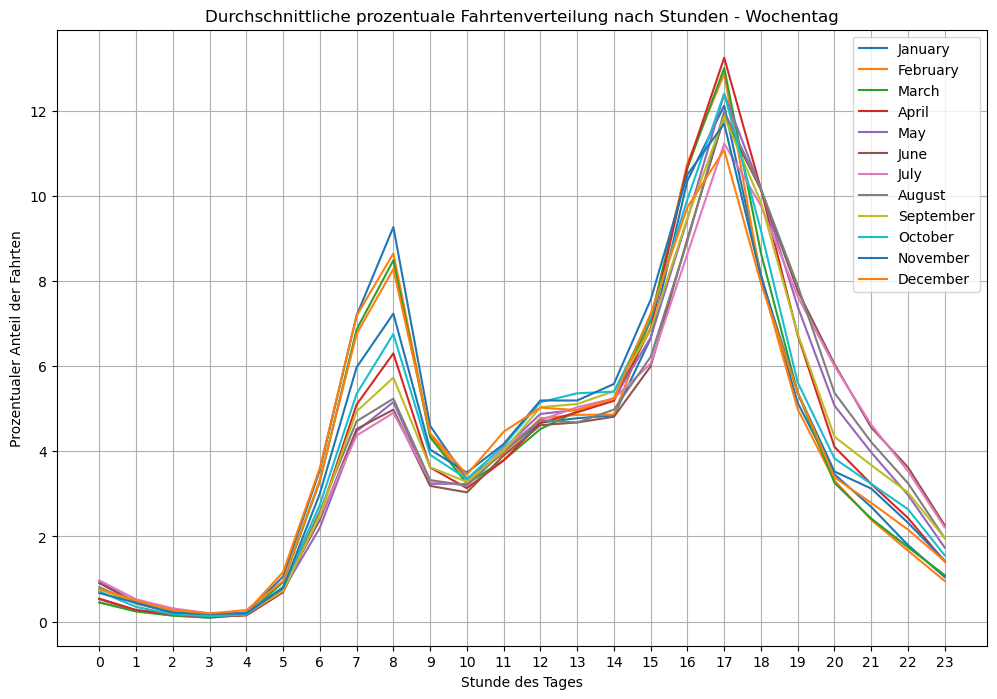

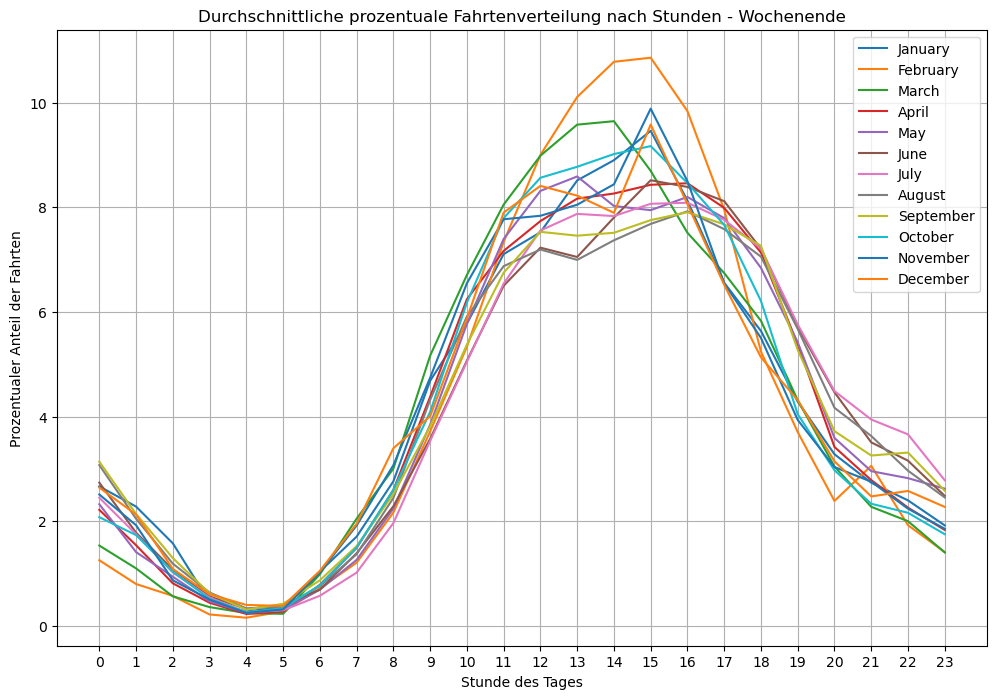

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Stellen Sie sicher, dass 'started_at' im datetime Format ist
df['started_at'] = pd.to_datetime(df['started_at'])

# Extrahieren von Monat, Stunde und Wochentag
df['month'] = df['started_at'].dt.month
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.weekday

# Klassifizieren der Tage als Wochentag (0-4) oder Wochenende (5, 6)
df['day_type'] = np.where(df['weekday'] < 5, 'Wochentag', 'Wochenende')

# Berechnung der Gesamtzahl der Fahrten je Stunde und Monat für jeden Tagtyp
total_rides_per_hour = df.groupby(['month', 'hour', 'day_type']).size().reset_index(name='rides')

# Berechnung der prozentualen Verteilung der Fahrten über die Stunden des Tages für jeden Monat und Tagtyp
total_rides_per_month = total_rides_per_hour.groupby(['month', 'day_type'])['rides'].sum().reset_index(name='total_rides')
percentage_rides = pd.merge(total_rides_per_hour, total_rides_per_month, on=['month', 'day_type'])
percentage_rides['percentage'] = (percentage_rides['rides'] / percentage_rides['total_rides']) * 100

# Erstellung der Diagramme
for day_type in ['Wochentag', 'Wochenende']:
    plt.figure(figsize=(12, 8))
    for month in percentage_rides['month'].unique():
        monthly_data = percentage_rides[(percentage_rides['month'] == month) & (percentage_rides['day_type'] == day_type)]
        plt.plot(monthly_data['hour'], monthly_data['percentage'], label=pd.to_datetime(str(month), format='%m').strftime('%B'))
    
    plt.title(f'Durchschnittliche prozentuale Fahrtenverteilung nach Stunden - {day_type}')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Prozentualer Anteil der Fahrten')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True)
    plt.show()

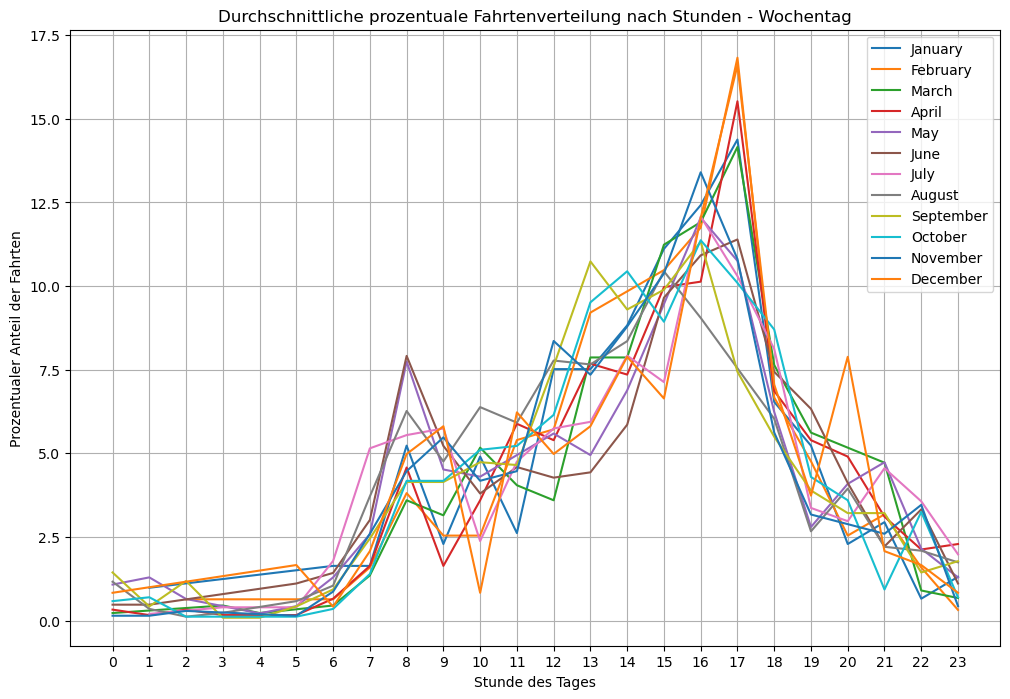

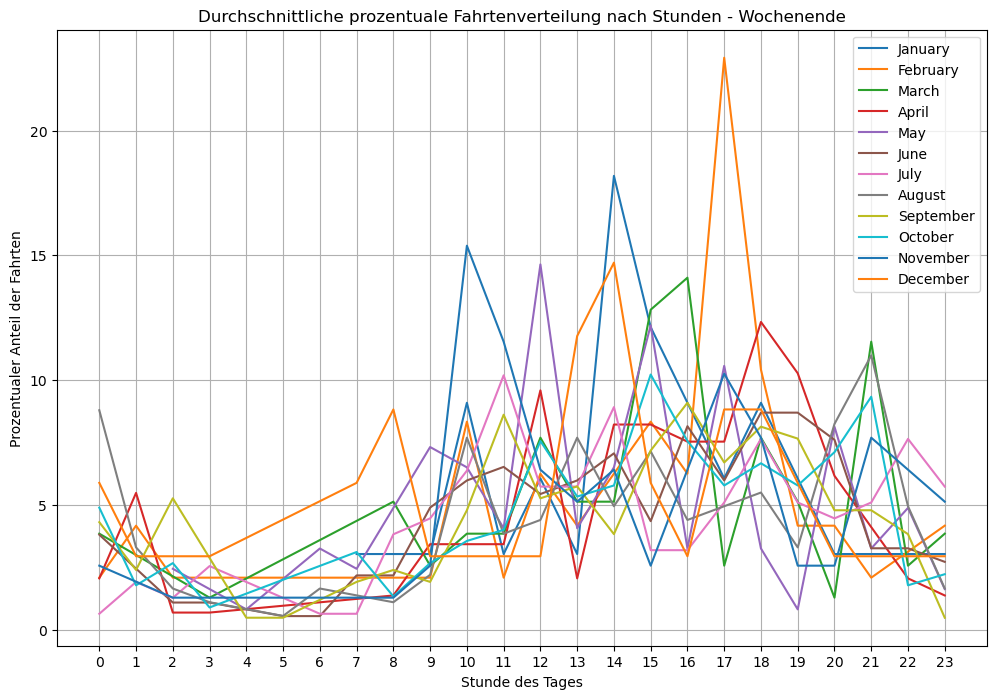

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Stellen Sie sicher, dass 'started_at' im datetime Format ist
df['started_at'] = pd.to_datetime(df['started_at'])

# Extrahieren von Monat, Stunde und Wochentag
df['month'] = df['started_at'].dt.month
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.weekday

# Klassifizieren der Tage als Wochentag (0-4) oder Wochenende (5, 6)
df['day_type'] = np.where(df['weekday'] < 5, 'Wochentag', 'Wochenende')

# Filtere Daten für eine spezifische Station
specific_station_id = '13028'  # Ersetze 'DeineStationID' durch die tatsächliche ID
station_data = df[df['start_station_id'] == specific_station_id]
# Berechnung der Gesamtzahl der Fahrten je Stunde und Monat für jeden Tagtyp
total_rides_per_hour = station_data.groupby(['month', 'hour', 'day_type']).size().reset_index(name='rides')

# Berechnung der prozentualen Verteilung der Fahrten über die Stunden des Tages für jeden Monat und Tagtyp
total_rides_per_month = total_rides_per_hour.groupby(['month', 'day_type'])['rides'].sum().reset_index(name='total_rides')
percentage_rides = pd.merge(total_rides_per_hour, total_rides_per_month, on=['month', 'day_type'])
percentage_rides['percentage'] = (percentage_rides['rides'] / percentage_rides['total_rides']) * 100

# Erstellung der Diagramme
for day_type in ['Wochentag', 'Wochenende']:
    plt.figure(figsize=(12, 8))
    for month in percentage_rides['month'].unique():
        monthly_data = percentage_rides[(percentage_rides['month'] == month) & (percentage_rides['day_type'] == day_type)]
        plt.plot(monthly_data['hour'], monthly_data['percentage'], label=pd.to_datetime(str(month), format='%m').strftime('%B'))
    
    plt.title(f'Durchschnittliche prozentuale Fahrtenverteilung nach Stunden - {day_type}')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Prozentualer Anteil der Fahrten')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True)
    plt.show()


In [102]:

unique_stations = unique_stations.dropna(subset=['cluster'])
unique_stations['cluster'] = unique_stations['cluster'].astype(int)
# Erstellung einer Karte zentriert um die durchschnittlichen Koordinaten
map_clusters = folium.Map(location=[unique_stations['end_lat'].mean(), unique_stations['end_lng'].mean()], zoom_start=13)

# Farben für die Cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Hinzufügen der Stationen zur Karte mit farbiger Markierung je nach Cluster
for lat, lon, cluster in zip(unique_stations['end_lat'], unique_stations['end_lng'], unique_stations['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster % len(colors)],  # Um sicherzustellen, dass die Farbenindexierung innerhalb der Grenzen bleibt
        fill=True,
        fill_color=colors[cluster % len(colors)],
        fill_opacity=0.7).add_to(map_clusters)

# Anzeige der Karte direkt im Notebook
map_clusters

In [64]:

unique_stations_k_4 = unique_stations_k_4.dropna(subset=['cluster'])
unique_stations_k_4['cluster'] = unique_stations_k_4['cluster'].astype(int)
# Erstellung einer Karte zentriert um die durchschnittlichen Koordinaten
map_clusters = folium.Map(location=[unique_stations_k_4['end_lat'].mean(), unique_stations_k_4['end_lng'].mean()], zoom_start=13)

# Farben für die Cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Hinzufügen der Stationen zur Karte mit farbiger Markierung je nach Cluster
for lat, lon, cluster in zip(unique_stations_k_4['end_lat'], unique_stations_k_4['end_lng'], unique_stations_k_4['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster % len(colors)],  # Um sicherzustellen, dass die Farbenindexierung innerhalb der Grenzen bleibt
        fill=True,
        fill_color=colors[cluster % len(colors)],
        fill_opacity=0.7).add_to(map_clusters)

# Anzeige der Karte direkt im Notebook
map_clusters

In [80]:

unique_stations_2 = unique_stations_2.dropna(subset=['cluster'])
unique_stations_2['cluster'] = unique_stations_2['cluster'].astype(int)
# Erstellung einer Karte zentriert um die durchschnittlichen Koordinaten
map_clusters = folium.Map(location=[unique_stations_2['end_lat'].mean(), unique_stations['end_lng'].mean()], zoom_start=13)

# Farben für die Cluster
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Hinzufügen der Stationen zur Karte mit farbiger Markierung je nach Cluster
for lat, lon, cluster in zip(unique_stations_2['end_lat'], unique_stations['end_lng'], unique_stations_2['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster % len(colors)],  # Um sicherzustellen, dass die Farbenindexierung innerhalb der Grenzen bleibt
        fill=True,
        fill_color=colors[cluster % len(colors)],
        fill_opacity=0.7).add_to(map_clusters)

# Anzeige der Karte direkt im Notebook
map_clusters

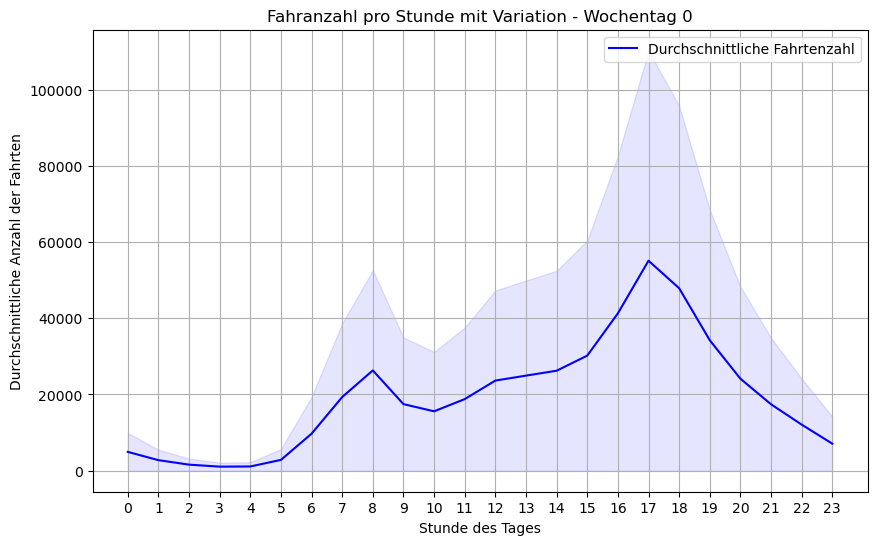

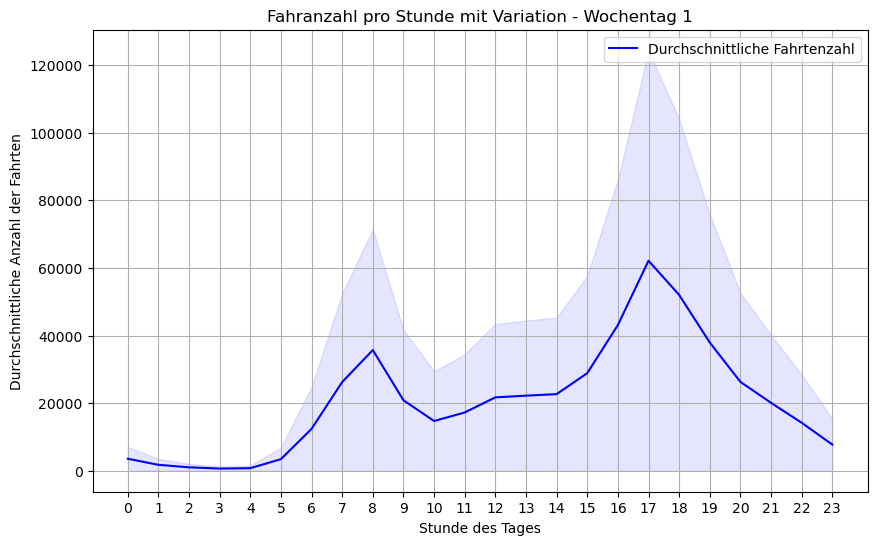

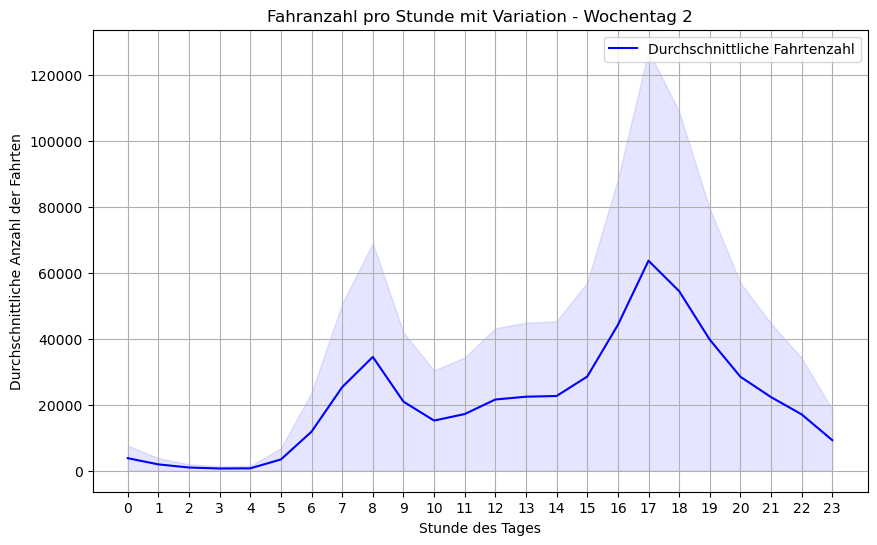

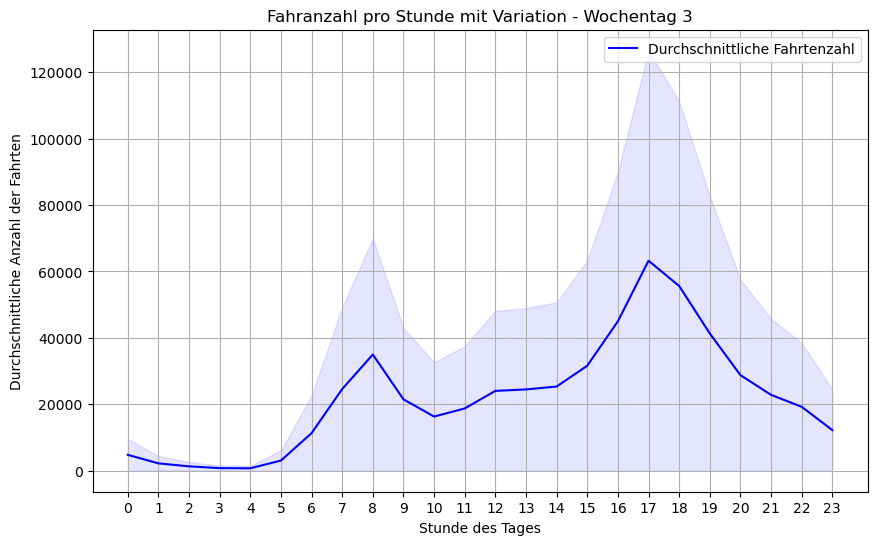

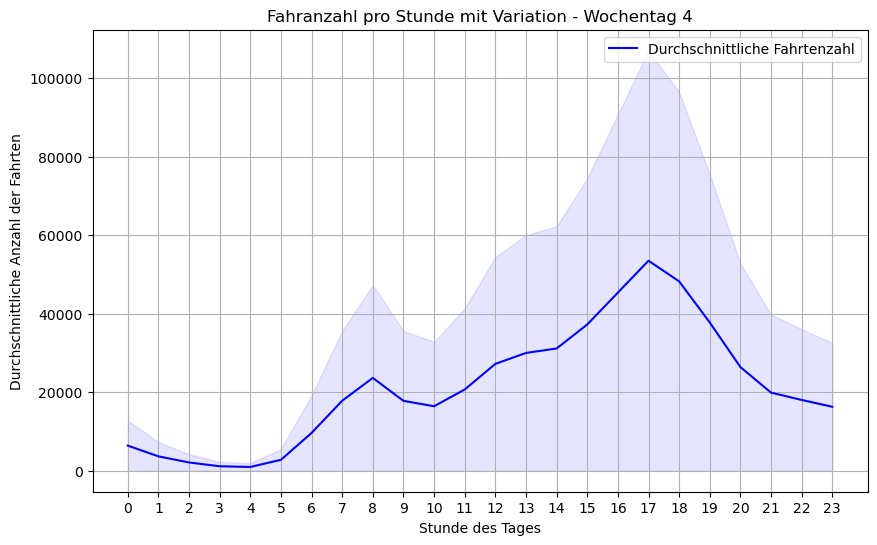

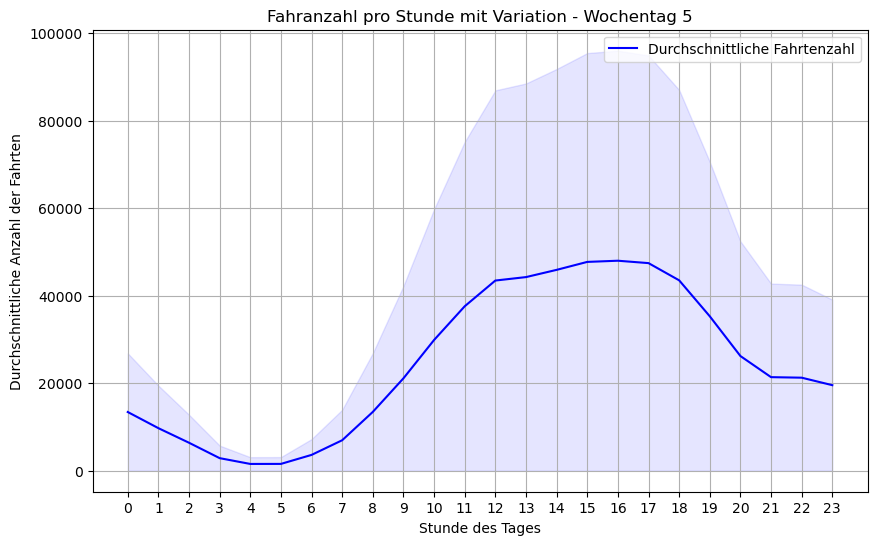

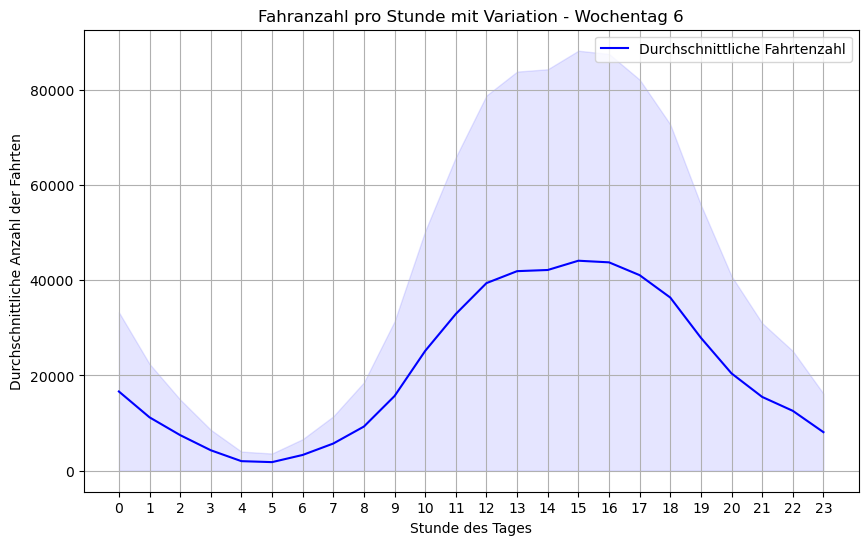

In [24]:


# Berechnung der durchschnittlichen Fahrtenzahl und Standardabweichung pro Stunde und Wochentag
stats = df.groupby(['weekday', 'hour']).agg(
    average_rides=('ride_id', 'count'),  # Ersetzen Sie 'ride_id' durch eine geeignete Zählspalte
    std_dev=('ride_id', 'count')  # Beispiel: Verwenden Sie dieselbe Spalte für ein einfaches Beispiel
).reset_index()

# Erstellung eines Plots für jeden Wochentag
for weekday in range(7):
    day_stats = stats[stats['weekday'] == weekday]

    plt.figure(figsize=(10, 6))
    plt.plot(day_stats['hour'], day_stats['average_rides'], label='Durchschnittliche Fahrtenzahl', color='blue')

    # Hinzufügen der Schattierung
    plt.fill_between(day_stats['hour'], 
                     day_stats['average_rides'] - day_stats['std_dev'], 
                     day_stats['average_rides'] + day_stats['std_dev'], 
                     color='blue', alpha=0.1)

    plt.title(f'Fahranzahl pro Stunde mit Variation - Wochentag {weekday}')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Durchschnittliche Anzahl der Fahrten')
    plt.xticks(range(24))
    plt.legend()
    plt.grid(True)
    plt.show()
